In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

Connection do database

In [144]:
DB_FILE_PATH = 'ceny_mieszkan.db'
connection = sqlite3.connect(DB_FILE_PATH)
df = pd.read_sql_query("SELECT * FROM mieszkanka", connection)
connection.close()

EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99170 entries, 0 to 99169
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           99170 non-null  int64  
 1   developer    99170 non-null  object 
 2   investment   99170 non-null  object 
 3   number       99170 non-null  object 
 4   area         99170 non-null  float64
 5   price        99170 non-null  int64  
 6   country      99160 non-null  object 
 7   voivodeship  99160 non-null  object 
 8   county       27478 non-null  object 
 9   city         96290 non-null  object 
 10  district     58707 non-null  object 
 11  lat          99170 non-null  float64
 12  lng          99170 non-null  float64
 13  floor        95730 non-null  float64
 14  floors       99170 non-null  int64  
 15  balcony      35211 non-null  float64
 16  loggia       6663 non-null   float64
 17  terrace      9250 non-null   float64
 18  garden       10019 non-null  float64
dtypes: f

In [5]:
df.describe()

id          area         price           lat           lng  \
count  99170.000000  99170.000000  9.917000e+04  99170.000000  99170.000000   
mean   49585.500000     58.439314  7.961183e+05     18.304330     51.523458   
std    28628.057435     31.481649  6.705208e+05      4.232786      2.891869   
min        1.000000      5.000000  2.100000e+05     -5.273033     36.323581   
25%    24793.250000     40.230000  5.000000e+05     17.021745     50.810471   
50%    49585.500000     51.390000  6.600000e+05     19.029263     52.080934   
75%    74377.750000     66.670000  8.800000e+05     20.640453     52.456515   
max    99170.000000   1239.300000  2.591640e+07     23.514184     54.830454   

              floor        floors       balcony       loggia      terrace  \
count  95730.000000  99170.000000  35211.000000  6663.000000  9250.000000   
mean       2.683004      1.082414      7.979922     6.844572    25.032791   
std        2.744205      0.322050      7.281906     5.928909    30.332002   
min       -1.000000      1.000000      0.440000     0.670000     1.000000   
25%        1.000000      1.000000      4.490000     3.620000     7.580000   
50%        2.000000      1.000000      5.830000     5.270000    15.000000   
75%        4.000000      1.000000      9.020000     8.000000    29.510000   
max       40.000000      5.000000    189.870000    86.480000   403.960000   

             garden  
count  10019.000000  
mean      79.108702  
std      101.381851  
min        0.970000  
25%       24.625000  
50%       46.120000  
75%       93.010000  
max     1313.910000

In [6]:
print(df['country'].value_counts())
print(df['voivodeship'].value_counts())

country
PL    96036
ES     3124
Name: count, dtype: int64
voivodeship
mazowieckie            18675
śląskie                10639
dolnośląskie           10437
pomorskie               9685
łódzkie                 9377
małopolskie             9341
wielkopolskie           8701
zachodniopomorskie      7215
kujawsko-pomorskie      3469
lubelskie               2778
warmińsko-mazurskie     1730
podlaskie               1387
Alicante                1354
Malaga                  1333
podkarpackie            1261
świętokrzyskie          1077
Murcja                   263
opolskie                 140
Almería                  135
lubuskie                 124
Baleary                   30
València                   9
Name: count, dtype: int64


In [7]:
df_pl = df[df['country'] != "ES"]
df_pl[df_pl['country'] != 'PL']

id                             developer           investment  \
7377    7378          Racis Development Sp. z o.o.       Perła Południa   
12893  12894  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
22741  22742  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
24518  24519                   Grupa Wawel Service        Na Błonie 106   
26767  26768                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
46380  46381                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
47989  47990                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
51777  51778                            KRK ESTATE               5CUBES   
70284  70285                              Buildman       Osiedle Zweika   
95351  95352                          Grupa Proins            Centralna   

         number    area    price country voivodeship county  city district  \
7377       6.13   61.85   480000    None        None   None  None     None   
12893      1.28   75.09   610000    None        None   None  None     None   
22741       1.4   73.06   570000    None        None   None  None     None   
24518      A/24  103.40  2020000    None        None   None  None     None   
26767   27.B.35   72.40   660000    None        None   None  None     None   
46380   27.A.12   76.60   670000    None        None   None  None     None   
47989   27.A.11   73.56   640000    None        None   None  None     None   
51777  S2-M.3.4   55.10   800000    None        None   None  None     None   
70284   B.01.09   78.89   660000    None        None   None  None     None   
95351     A2.38  219.70  2570000    None        None   None  None     None   

             lat        lng  floor  floors  balcony  loggia  terrace  garden  
7377   22.922888  54.082202    2.0       1      NaN     NaN      NaN     NaN  
12893  23.118810  53.149088    1.0       1    25.47     NaN      NaN     NaN  
22741  23.118810  53.149088    1.0       1    14.74     NaN      NaN     NaN  
24518  19.877545  50.072890    2.0       1    14.17     NaN    60.15     NaN  
26767  20.608041  52.196191    3.0       1      NaN     NaN      NaN     NaN  
46380  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
47989  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
51777  19.903748  50.095389    3.0       1    15.79     NaN      NaN     NaN  
70284  18.936843  50.292208    1.0       1     6.14     NaN      NaN     NaN  
95351  20.011240  50.065856    0.0       1      NaN     NaN      NaN     NaN

mamy None, widząc że to Polska na podstawie nazwy nieruchomości oraz po współrzędnych możemy wywnioskować że to PL

In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [9]:
# geolocator = Nominatim(user_agent='geoapi')
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# def get_location_info(row):
#     try:
#         location = reverse((row['lng'], row['lat']), exactly_one=True)
#         if location:
#             address = location.raw.get('address', {})
#             return pd.Series({
#                 'country':address.get('country'),
#                 'voivodeship':address.get('state'),
#                 'county': address.get('county') or address.get('state_district') or address.get('region') or address.get('municipality'),
#                 'city':address.get('city') or address.get('town') or address.get('village'),
#                 'district': address.get('suburb') or address.get('neighbourhood') or address.get('city_district')
#             })
#     except:
#         return pd.Series({'country': None, 'voivodeship': None, 'county': None, 'city': None, 'district': None})
    
# mask = df_pl['city'].isna()
# df_pl.loc[mask, ['country', 'voivodeship', 'county', 'city', 'disctrict']] = df_pl[mask].apply(get_location_info, axis=1)

In [10]:
rows = df[~df['country'].isin(['PL', 'ES'])].index
df.loc[rows]

id                             developer           investment  \
7377    7378          Racis Development Sp. z o.o.       Perła Południa   
12893  12894  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
22741  22742  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
24518  24519                   Grupa Wawel Service        Na Błonie 106   
26767  26768                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
46380  46381                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
47989  47990                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
51777  51778                            KRK ESTATE               5CUBES   
70284  70285                              Buildman       Osiedle Zweika   
95351  95352                          Grupa Proins            Centralna   

         number    area    price country voivodeship county  city district  \
7377       6.13   61.85   480000    None        None   None  None     None   
12893      1.28   75.09   610000    None        None   None  None     None   
22741       1.4   73.06   570000    None        None   None  None     None   
24518      A/24  103.40  2020000    None        None   None  None     None   
26767   27.B.35   72.40   660000    None        None   None  None     None   
46380   27.A.12   76.60   670000    None        None   None  None     None   
47989   27.A.11   73.56   640000    None        None   None  None     None   
51777  S2-M.3.4   55.10   800000    None        None   None  None     None   
70284   B.01.09   78.89   660000    None        None   None  None     None   
95351     A2.38  219.70  2570000    None        None   None  None     None   

             lat        lng  floor  floors  balcony  loggia  terrace  garden  
7377   22.922888  54.082202    2.0       1      NaN     NaN      NaN     NaN  
12893  23.118810  53.149088    1.0       1    25.47     NaN      NaN     NaN  
22741  23.118810  53.149088    1.0       1    14.74     NaN      NaN     NaN  
24518  19.877545  50.072890    2.0       1    14.17     NaN    60.15     NaN  
26767  20.608041  52.196191    3.0       1      NaN     NaN      NaN     NaN  
46380  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
47989  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
51777  19.903748  50.095389    3.0       1    15.79     NaN      NaN     NaN  
70284  18.936843  50.292208    1.0       1     6.14     NaN      NaN     NaN  
95351  20.011240  50.065856    0.0       1      NaN     NaN      NaN     NaN

In [11]:
df_pl.loc[rows]

id                             developer           investment  \
7377    7378          Racis Development Sp. z o.o.       Perła Południa   
12893  12894  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
22741  22742  BiaVita Development Sp. z o.o. Sp.k.       Villa Antoniuk   
24518  24519                   Grupa Wawel Service        Na Błonie 106   
26767  26768                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
46380  46381                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
47989  47990                      Jakon Sp. z o.o.  Bulwary Błonie N.27   
51777  51778                            KRK ESTATE               5CUBES   
70284  70285                              Buildman       Osiedle Zweika   
95351  95352                          Grupa Proins            Centralna   

         number    area    price country voivodeship county  city district  \
7377       6.13   61.85   480000    None        None   None  None     None   
12893      1.28   75.09   610000    None        None   None  None     None   
22741       1.4   73.06   570000    None        None   None  None     None   
24518      A/24  103.40  2020000    None        None   None  None     None   
26767   27.B.35   72.40   660000    None        None   None  None     None   
46380   27.A.12   76.60   670000    None        None   None  None     None   
47989   27.A.11   73.56   640000    None        None   None  None     None   
51777  S2-M.3.4   55.10   800000    None        None   None  None     None   
70284   B.01.09   78.89   660000    None        None   None  None     None   
95351     A2.38  219.70  2570000    None        None   None  None     None   

             lat        lng  floor  floors  balcony  loggia  terrace  garden  
7377   22.922888  54.082202    2.0       1      NaN     NaN      NaN     NaN  
12893  23.118810  53.149088    1.0       1    25.47     NaN      NaN     NaN  
22741  23.118810  53.149088    1.0       1    14.74     NaN      NaN     NaN  
24518  19.877545  50.072890    2.0       1    14.17     NaN    60.15     NaN  
26767  20.608041  52.196191    3.0       1      NaN     NaN      NaN     NaN  
46380  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
47989  20.608041  52.196191    2.0       1      NaN     NaN      NaN     NaN  
51777  19.903748  50.095389    3.0       1    15.79     NaN      NaN     NaN  
70284  18.936843  50.292208    1.0       1     6.14     NaN      NaN     NaN  
95351  20.011240  50.065856    0.0       1      NaN     NaN      NaN     NaN

In [12]:
rs = df_pl[df_pl['city'].isnull()]
rs

id                       developer      investment number    area  \
115      116               OnDom Real Estate  Ville Ogrodowa     7F  257.39   
116      117               OnDom Real Estate  Ville Ogrodowa     7E  257.39   
306      307           RGM-INVEST SP. z o.o.    Park Łochowo    A01   98.14   
366      367      ATC Development Sp. z o.o.   Osiedle Kanva     55  107.07   
367      368      ATC Development Sp. z o.o.   Osiedle Kanva     53  106.95   
...      ...                             ...             ...    ...     ...   
98359  98360                      Polna Park      Polna Park   5/19   32.47   
98483  98484         Perfect Home Investment         Loft 38   2/29   56.90   
98685  98686  J.W. Construction Holding S.A.    Na Wzgórzach  B3.13   41.38   
98884  98885        NEXX Developer Sp. z o.o      Green Park     31   50.74   
98885  98886        NEXX Developer Sp. z o.o      Green Park     55   51.06   

         price country         voivodeship         county  city district  \
115    2910000      PL         mazowieckie    pruszkowski  None     None   
116    2910000      PL         mazowieckie    pruszkowski  None     None   
306     680000      PL  kujawsko-pomorskie       bydgoski  None     None   
366     680000      PL            lubuskie     nowosolski  None     None   
367     680000      PL            lubuskie     nowosolski  None     None   
...        ...     ...                 ...            ...   ...      ...   
98359   420000      PL        dolnośląskie        kłodzki  None     None   
98483   420000      PL  kujawsko-pomorskie  inowrocławski  None     None   
98685   420000      PL         małopolskie     myślenicki  None     None   
98884   420000      PL             śląskie           None  None     None   
98885   420000      PL             śląskie           None  None     None   

             lat        lng  floor  floors  balcony  loggia  terrace  garden  
115    20.875502  52.177220    NaN       3     20.4     NaN     51.7     NaN  
116    20.875502  52.177220    NaN       3     20.4     NaN     51.7     NaN  
306    17.850402  53.122613    NaN       3      NaN     NaN      NaN  254.06  
366    15.663584  51.789048    NaN       1      NaN     NaN      NaN  569.00  
367    15.663584  51.789048    NaN       1      NaN     NaN      NaN  715.00  
...          ...        ...    ...     ...      ...     ...      ...     ...  
98359  16.383861  50.406483    2.0       1      NaN     NaN      NaN     NaN  
98483  18.246176  52.802729    2.0       1      NaN     NaN      NaN     NaN  
98685  19.962068  49.873393    2.0       1      NaN     NaN      NaN     NaN  
98884  18.673803  50.043718    2.0       1      5.1     NaN      NaN     NaN  
98885  18.673803  50.043718    3.0       1      5.9     NaN      NaN     NaN  

[2813 rows x 19 columns]

Na ten moment zostawimy nieuzupełnione. W późniejszej fazie uzupełnimy.

In [13]:
df_pl.isnull().sum()

id                 0
developer          0
investment         0
number             0
area               0
price              0
country           10
voivodeship       10
county         68568
city            2813
district       37353
lat                0
lng                0
floor           3205
floors             0
balcony        60897
loggia         89402
terrace        89371
garden         86563
dtype: int64

In [14]:
df_pl.drop(columns=['county', 'district'], inplace=True)
df_pl

id                        developer  \
0          1           Baltic Wave Sp. z o.o.   
1          2      Dekpol Deweloper Sp. z o.o.   
2          3      Dekpol Deweloper Sp. z o.o.   
3          4               Masterm Investment   
4          5               Masterm Investment   
...      ...                              ...   
99163  99164                    CL Inwestycje   
99164  99165                    CL Inwestycje   
99167  99168                            BOZ-2   
99168  99169  Rogowski Development Sp. z o.o.   
99169  99170  Rogowski Development Sp. z o.o.   

                             investment   number   area    price country  \
0                           Baltic Wave    12.16  60.27  1950000      PL   
1                              Granaria  5.3.217  67.05  1950000      PL   
2                              Granaria  5.3.217  67.05  1950000      PL   
3                    Aquart Świnoujście  A.05.01  48.67  1950000      PL   
4                    Aquart Świnoujście  A.05.10  48.68  1950000      PL   
...                                 ...      ...    ...      ...     ...   
99163  Osiedle Kochanowskiego - Gliwice     A.39  42.35   420000      PL   
99164  Osiedle Kochanowskiego - Gliwice     C.14  40.26   420000      PL   
99167                     Strażacka 54G       62  42.39   420000      PL   
99168          Apartamenty Róg Młynowej      237  32.63   420000      PL   
99169          Apartamenty Róg Młynowej      251  32.63   420000      PL   

              voivodeship         city        lat        lng  floor  floors  \
0      zachodniopomorskie    Kołobrzeg  15.587000  54.183924   12.0       1   
1               pomorskie       Gdańsk  18.658644  54.348504    3.0       1   
2               pomorskie       Gdańsk  18.658672  54.348509    3.0       1   
3      zachodniopomorskie  Świnoujście  14.259304  53.918131    5.0       1   
4      zachodniopomorskie  Świnoujście  14.259304  53.918131    5.0       1   
...                   ...          ...        ...        ...    ...     ...   
99163             śląskie      Gliwice  18.667949  50.286099    3.0       1   
99164             śląskie      Gliwice  18.667949  50.286099    1.0       1   
99167        podkarpackie      Rzeszów  22.009140  50.000927    0.0       1   
99168           podlaskie    Białystok  23.145021  53.127119    2.0       1   
99169           podlaskie    Białystok  23.145021  53.127119    3.0       1   

       balcony  loggia  terrace  garden  
0         5.82     NaN      NaN     NaN  
1          NaN     NaN      NaN     NaN  
2          NaN     NaN      NaN     NaN  
3          NaN     NaN      NaN     NaN  
4          NaN     NaN      NaN     NaN  
...        ...     ...      ...     ...  
99163     2.80     NaN      NaN     NaN  
99164     2.80     NaN      NaN     NaN  
99167      NaN     NaN      NaN     NaN  
99168      NaN     NaN      NaN     NaN  
99169      NaN     NaN      NaN     NaN  

[96046 rows x 17 columns]

In [15]:
df_pl = df_pl[~df_pl['city'].isna()]

In [16]:
df_pl.shape

(93233, 17)

In [17]:
df_pl.isna().sum()

id                 0
developer          0
investment         0
number             0
area               0
price              0
country            0
voivodeship        0
city               0
lat                0
lng                0
floor           2505
floors             0
balcony        58644
loggia         86609
terrace        86943
garden         84155
dtype: int64

In [18]:
df_pl[['balcony', 'loggia', 'terrace', 'garden']] = df_pl[['balcony', 'loggia', 'terrace', 'garden']].fillna(0)
df_pl

id                        developer  \
0          1           Baltic Wave Sp. z o.o.   
1          2      Dekpol Deweloper Sp. z o.o.   
2          3      Dekpol Deweloper Sp. z o.o.   
3          4               Masterm Investment   
4          5               Masterm Investment   
...      ...                              ...   
99163  99164                    CL Inwestycje   
99164  99165                    CL Inwestycje   
99167  99168                            BOZ-2   
99168  99169  Rogowski Development Sp. z o.o.   
99169  99170  Rogowski Development Sp. z o.o.   

                             investment   number   area    price country  \
0                           Baltic Wave    12.16  60.27  1950000      PL   
1                              Granaria  5.3.217  67.05  1950000      PL   
2                              Granaria  5.3.217  67.05  1950000      PL   
3                    Aquart Świnoujście  A.05.01  48.67  1950000      PL   
4                    Aquart Świnoujście  A.05.10  48.68  1950000      PL   
...                                 ...      ...    ...      ...     ...   
99163  Osiedle Kochanowskiego - Gliwice     A.39  42.35   420000      PL   
99164  Osiedle Kochanowskiego - Gliwice     C.14  40.26   420000      PL   
99167                     Strażacka 54G       62  42.39   420000      PL   
99168          Apartamenty Róg Młynowej      237  32.63   420000      PL   
99169          Apartamenty Róg Młynowej      251  32.63   420000      PL   

              voivodeship         city        lat        lng  floor  floors  \
0      zachodniopomorskie    Kołobrzeg  15.587000  54.183924   12.0       1   
1               pomorskie       Gdańsk  18.658644  54.348504    3.0       1   
2               pomorskie       Gdańsk  18.658672  54.348509    3.0       1   
3      zachodniopomorskie  Świnoujście  14.259304  53.918131    5.0       1   
4      zachodniopomorskie  Świnoujście  14.259304  53.918131    5.0       1   
...                   ...          ...        ...        ...    ...     ...   
99163             śląskie      Gliwice  18.667949  50.286099    3.0       1   
99164             śląskie      Gliwice  18.667949  50.286099    1.0       1   
99167        podkarpackie      Rzeszów  22.009140  50.000927    0.0       1   
99168           podlaskie    Białystok  23.145021  53.127119    2.0       1   
99169           podlaskie    Białystok  23.145021  53.127119    3.0       1   

       balcony  loggia  terrace  garden  
0         5.82     0.0      0.0     0.0  
1         0.00     0.0      0.0     0.0  
2         0.00     0.0      0.0     0.0  
3         0.00     0.0      0.0     0.0  
4         0.00     0.0      0.0     0.0  
...        ...     ...      ...     ...  
99163     2.80     0.0      0.0     0.0  
99164     2.80     0.0      0.0     0.0  
99167     0.00     0.0      0.0     0.0  
99168     0.00     0.0      0.0     0.0  
99169     0.00     0.0      0.0     0.0  

[93233 rows x 17 columns]

In [19]:
df_pl['floor'] = df['floor'].fillna(-1)

Najlepszą zmienną, którą będziemy potem przewidywać będzie cena za metr kwadratowy (nie duży zakres wartości)

In [20]:
df_pl['price_m2'] = df_pl['price'] / df_pl['area']

In [21]:
# czy lokal jest usługowy?
df_pl['is_commercial'] = df_pl['number'].str.startswith('U')

In [22]:
df_pl.describe()

id          area         price           lat           lng  \
count  93233.000000  93233.000000  9.323300e+04  93233.000000  93233.000000   
mean   49577.007798     56.014762  7.429567e+05     18.985317     51.988230   
std    28563.517981     26.734128  4.256041e+05      1.970037      1.388266   
min        1.000000      5.000000  2.100000e+05     14.232837     49.281500   
25%    24734.000000     39.900000  5.000000e+05     17.064818     51.055766   
50%    49498.000000     50.140000  6.500000e+05     19.091438     52.117108   
75%    74375.000000     64.900000  8.500000e+05     20.673060     52.569699   
max    99170.000000   1239.300000  2.065860e+07     23.514184     54.830454   

              floor        floors       balcony        loggia       terrace  \
count  93233.000000  93233.000000  93233.000000  93233.000000  93233.000000   
mean       2.628533      1.069428      2.939781      0.483560      1.160354   
std        2.762055      0.299010      5.642625      2.326872      6.624174   
min       -1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      0.000000   
50%        2.000000      1.000000      0.000000      0.000000      0.000000   
75%        4.000000      1.000000      4.700000      0.000000      0.000000   
max       35.000000      5.000000    138.620000     86.480000    403.960000   

             garden       price_m2  
count  93233.000000   93233.000000  
mean       7.191349   13782.140294  
std       35.644420    5255.657334  
min        0.000000     855.321552  
25%        0.000000   10314.262691  
50%        0.000000   12748.295286  
75%        0.000000   15912.305516  
max     1313.910000  198000.000000

<Axes: ylabel='price_m2'>

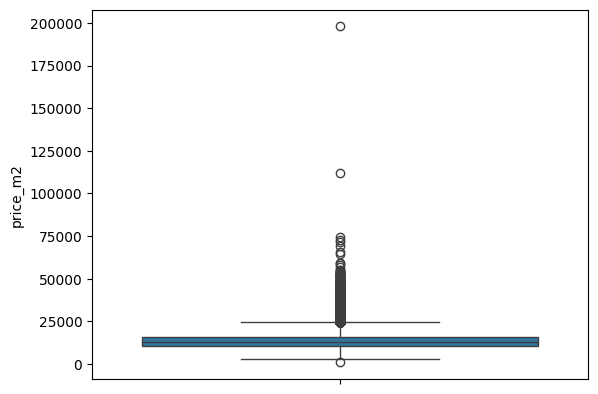

In [23]:
sns.boxplot(df_pl['price_m2'])

In [24]:
df_pl.sort_values(by='price_m2')

id                              developer  \
25176  25177                                    ARD   
47969  47970                      Novdom Sp. z o.o.   
81279  81280                   Eldor Bud Sp. z o.o.   
8344    8345                   Eldor Bud Sp. z o.o.   
36194  36195         Apartamenty Szczyrk Sp. z o.o.   
...      ...                                    ...   
70891  70892  Assethome – Przedstawiciel Dewelopera   
86144  86145  Assethome – Przedstawiciel Dewelopera   
23902  23903                      Novdom Sp. z o.o.   
68677  68678               Matexi Polska Sp. z o.o.   
29745  29746                 Platforma Mieszkaniowa   

                           investment   number     area     price country  \
25176  Apartamenty na Chopina II etap    C.4.3  1239.30   1060000      PL   
47969           Apartamenty Macadamia       18   227.94    640000      PL   
81279    Osiedle Żeromskiego etap III        P   194.96    610000      PL   
8344     Osiedle Żeromskiego etap III        P   194.96    620000      PL   
36194             Apartamenty Szczyrk      B18    74.30    260000      PL   
...                               ...      ...      ...       ...     ...   
70891     The Sea Resort Międzyzdroje    B1-03    80.45   5730000      PL   
86144     The Sea Resort Międzyzdroje    A1-05    60.34   4380000      PL   
23902           Apartamenty Macadamia       32    35.57   2640000      PL   
68677                      Żelazna 54  U.00.02   184.16  20658600      PL   
29745                 Naramowicka 172    A0.01     5.00    990000      PL   

               voivodeship          city        lat        lng  floor  floors  \
25176   kujawsko-pomorskie     Bydgoszcz  18.021742  53.124240    4.0       2   
47969  warmińsko-mazurskie       Olsztyn  20.480141  53.781898    5.0       1   
81279          mazowieckie      Tobolice  21.595880  53.046051   -1.0       2   
8344           mazowieckie      Tobolice  21.595880  53.046051   -1.0       2   
36194              śląskie       Szczyrk  19.029234  49.718571    2.0       1   
...                    ...           ...        ...        ...    ...     ...   
70891   zachodniopomorskie  Międzyzdroje  14.443170  53.930185    1.0       1   
86144   zachodniopomorskie  Międzyzdroje  14.443170  53.930185    1.0       1   
23902  warmińsko-mazurskie       Olsztyn  20.480141  53.781898    4.0       1   
68677          mazowieckie      Warszawa  20.991590  52.233865    0.0       1   
29745        wielkopolskie        Poznań  16.948366  52.451507    0.0       1   

       balcony  loggia  terrace  garden       price_m2  is_commercial  
25176    21.00     0.0     44.0     0.0     855.321552          False  
47969    31.45     3.7      0.0     0.0    2807.756427          False  
81279     0.00     0.0      0.0     0.0    3128.846943          False  
8344      0.00     0.0      0.0     0.0    3180.139516          False  
36194     0.00     0.0      0.0     0.0    3499.327052          False  
...        ...     ...      ...     ...            ...            ...  
70891     0.00     0.0      0.0     0.0   71224.362958          False  
86144     0.00     0.0      0.0     0.0   72588.664236          False  
23902     7.83     0.0      0.0     0.0   74219.848187          False  
68677     0.00     0.0      0.0     0.0  112177.454387           True  
29745     0.00     0.0      0.0     0.0  198000.000000          False  

[93233 rows x 19 columns]

za dużo dla poznania i za mało dla bydgoszczy

In [25]:
df_pl.loc[df['id'] == 29746, "area"] = 72.27
df_pl.loc[df['id'] == 25177, "area"] /= 10
df_pl['price_m2'] = df_pl['price'] / df_pl['area']

<Axes: xlabel='price_m2', ylabel='Count'>

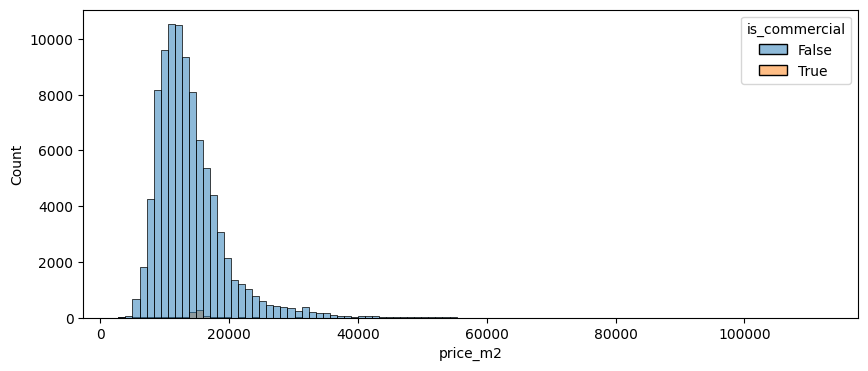

In [26]:
import numpy as np
plt.figure(figsize=(10,4))
sns.histplot(data = df_pl, x = 'price_m2', bins=100, hue="is_commercial")

In [27]:
100 * ( df_pl[df_pl['price_m2'] > 30000].shape[0] / df_pl.shape[0])

1.8137354799266356

usuwamy tanie i drogie

In [28]:
100 * (df_pl[df_pl['price_m2'] < 5000].shape[0] / df_pl.shape[0])

0.07722587495843747

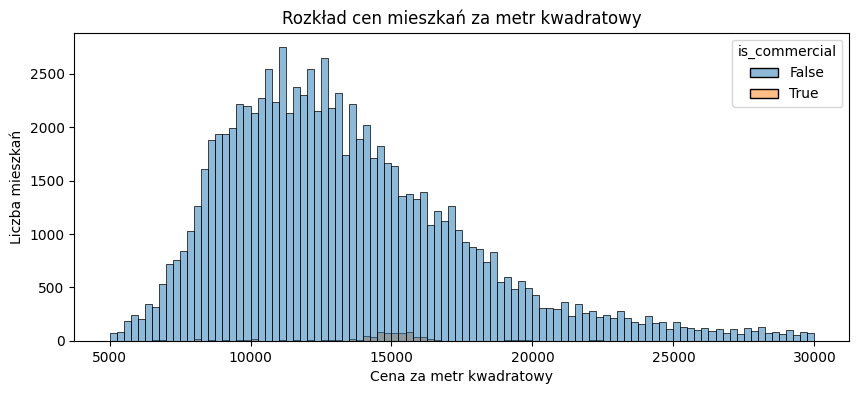

In [29]:
df_pl = df_pl[df_pl['price_m2'].between(5000, 30000)].copy()
plt.figure(figsize=(10,4))
sns.histplot(data=df_pl, x='price_m2', hue='is_commercial', bins=100)
plt.title('Rozkład cen mieszkań za metr kwadratowy')
plt.xlabel('Cena za metr kwadratowy')
plt.ylabel('Liczba mieszkań')
plt.show()

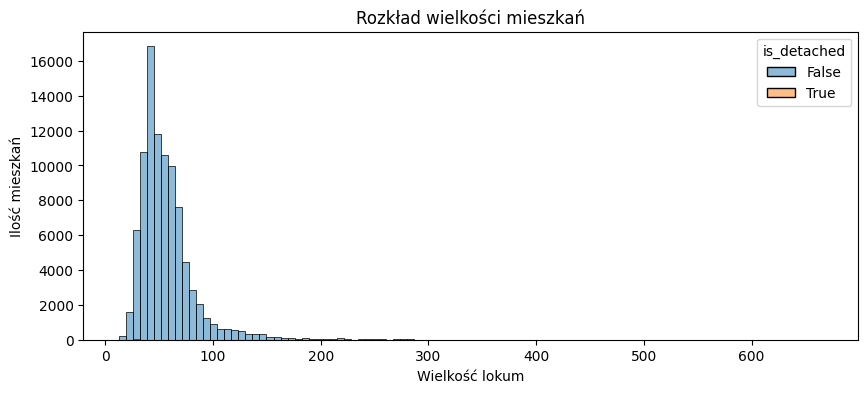

In [30]:
df_pl.loc[:, "is_detached"] = df["floor"] == -1
plt.figure(figsize=(10,4))
sns.histplot(data=df_pl, x="area", hue='is_detached', bins=100)
plt.xlabel('Wielkość lokum')
plt.ylabel('Ilość mieszkań')
plt.title('Rozkład wielkości mieszkań')
plt.show()

Sprawdźmy czy jest coś dziwnego w powierzchniach

In [31]:
df_pl.sort_values(by='area')
df_pl[df_pl['investment'].str.contains("Gaia")]

id developer investment number   area    price country  voivodeship  \
12031  12032   PROFBUD  Gaia Park     21  339.6  4290000      PL  mazowieckie   
12032  12033   PROFBUD  Gaia Park     23  339.6  4290000      PL  mazowieckie   
12033  12034   PROFBUD  Gaia Park     24  339.6  4290000      PL  mazowieckie   
16383  16384   PROFBUD  Gaia Park     16  283.9  3470000      PL  mazowieckie   
19963  19964   PROFBUD  Gaia Park     26  339.6  4440000      PL  mazowieckie   
25170  25171   PROFBUD  Gaia Park     17  339.6  4240000      PL  mazowieckie   
25171  25172   PROFBUD  Gaia Park     18  339.6  4240000      PL  mazowieckie   
28058  28059   PROFBUD  Gaia Park     27  290.5  3770000      PL  mazowieckie   
28059  28060   PROFBUD  Gaia Park     28  290.5  3770000      PL  mazowieckie   
28060  28061   PROFBUD  Gaia Park     29  290.5  3770000      PL  mazowieckie   
28150  28151   PROFBUD  Gaia Park     30  290.5  3830000      PL  mazowieckie   
28980  28981   PROFBUD  Gaia Park     25  339.6  4370000      PL  mazowieckie   
52847  52848   PROFBUD  Gaia Park      1  246.2  3110000      PL  mazowieckie   
52848  52849   PROFBUD  Gaia Park      6  246.2  3110000      PL  mazowieckie   

           city        lat        lng  floor  floors  balcony  loggia  \
12031  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
12032  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
12033  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
16383  Warszawa  21.110273  52.091203    0.0       2      5.0     9.7   
19963  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
25170  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
25171  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
28058  Warszawa  21.110273  52.091203    0.0       2      5.7     4.5   
28059  Warszawa  21.110273  52.091203    0.0       2      5.7     4.5   
28060  Warszawa  21.110273  52.091203    0.0       2      5.7     4.5   
28150  Warszawa  21.110273  52.091203    0.0       2      5.7     4.5   
28980  Warszawa  21.110273  52.091203    0.0       2      6.9     9.4   
52847  Warszawa  21.110273  52.091203    0.0       2      0.0     4.7   
52848  Warszawa  21.110273  52.091203    0.0       2      0.0     4.7   

       terrace  garden      price_m2  is_commercial  is_detached  
12031     41.7     0.0  12632.508834          False        False  
12032     41.7     0.0  12632.508834          False        False  
12033     41.7     0.0  12632.508834          False        False  
16383     40.6     0.0  12222.613596          False        False  
19963     41.7     0.0  13074.204947          False        False  
25170     41.7     0.0  12485.276796          False        False  
25171     41.7     0.0  12485.276796          False        False  
28058     45.1     0.0  12977.624785          False        False  
28059     45.1     0.0  12977.624785          False        False  
28060     45.1     0.0  12977.624785          False        False  
28150     45.1     0.0  13184.165232          False        False  
28980     41.7     0.0  12868.080094          False        False  
52847     36.6     0.0  12632.006499          False        False  
52848     36.6     0.0  12632.006499          False        False

Ucinamy do 200m^2

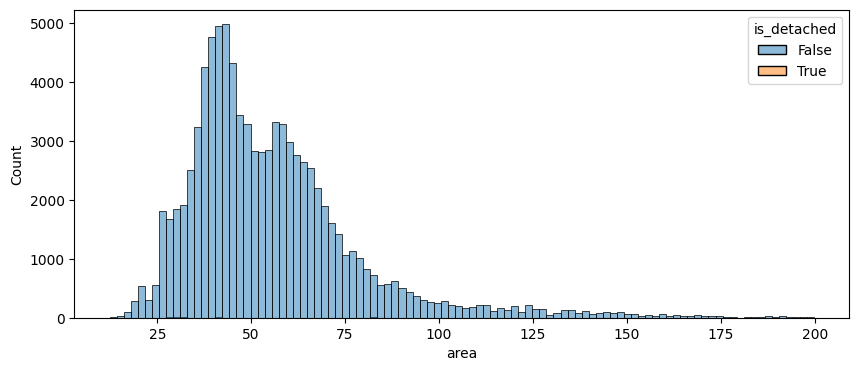

In [32]:
plt.figure(figsize=(10,4))
sns.histplot(data=df_pl[df_pl['area'] < 200], x='area', bins=100, hue='is_detached')
plt.show()

Wizualizacja współrzędnych poglądowo

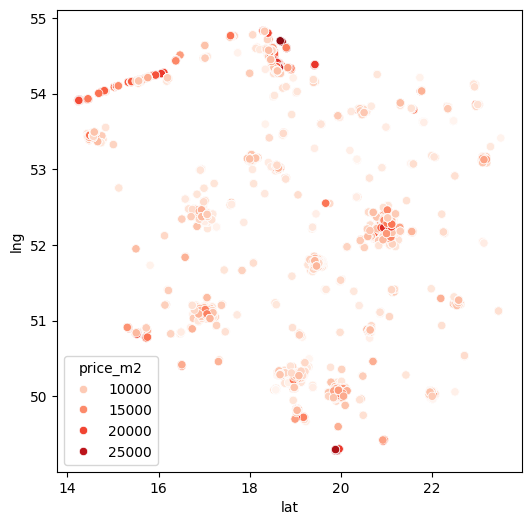

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_pl, x='lat', y='lng', hue='price_m2', palette='Reds')
plt.show()

Wniosek jest prosty - kolumny zostały źle nazwane, ponieważ Polska leży w okolicach 19 lng i 50 lat.

In [34]:
df_pl.rename(columns={'lng':'lat', 'lat':'lng'}, inplace=True)
df_pl.columns

Index(['id', 'developer', 'investment', 'number', 'area', 'price', 'country',
       'voivodeship', 'city', 'lng', 'lat', 'floor', 'floors', 'balcony',
       'loggia', 'terrace', 'garden', 'price_m2', 'is_commercial',
       'is_detached'],
      dtype='object')

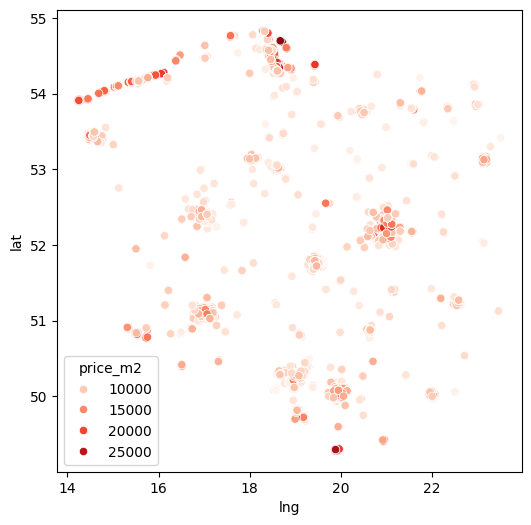

In [35]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_pl, x='lng', y='lat', hue='price_m2', palette='Reds')
plt.show()

Zapis do pliku parquet

In [36]:
df_pl.to_parquet('ceny_mieszkan_v1.parquet', index=False)

Mediana dla konkretnego dewelopera

In [37]:
dev_price = df_pl.groupby('developer').agg(
    median_price_m2=('price_m2', 'median'),
    num_investment=('price_m2', 'count')).reset_index()
dev_price.sort_values(by='median_price_m2')

developer  median_price_m2  num_investment
342  Fenix Construction Sp. z o.o. Sp.k.      5040.637699               2
937               Shell House Sp. z o.o.      5157.630069               4
60          Aj-Pl Development Sp. z o.o.      5199.870552              16
439              Góralczyk Nieruchomości      5342.667649               5
929                                 Sato      5356.125356               1
..                                   ...              ...             ...
732                         Oaza Mokotów     28448.275862              19
606                    MJM 11 Sp. z o.o.     28727.770178               1
580                         Lions Estate     29254.642585               2
736               Olivia Home Sp. z o.o.     29454.826921              74
674                     Monea Properties     29623.093407               1

[1112 rows x 3 columns]

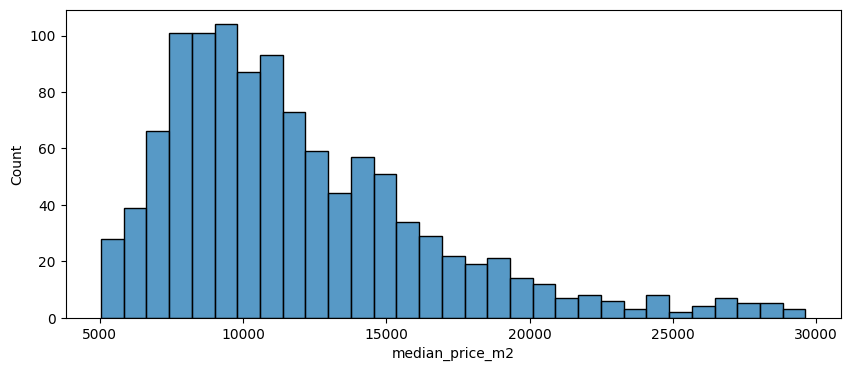

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(data=dev_price, x='median_price_m2', bins=31)
plt.show()

Statystyki dla konkretnego dewelopera i inwestycji

In [39]:
oliva_dev = df_pl[df_pl['developer'] == "Olivia Home Sp. z o.o."]
oliva_lesna = oliva_dev[oliva_dev['investment'] == 'Leśna Sopot']
print(oliva_lesna['price_m2'].median())
print(oliva_dev['price_m2'].median())

26858.51024940615
29454.826920613687


Możemy znaleźć największy rozstrzał u dewelopera ceny za m^2

In [40]:
dev_price2 = df_pl.groupby('developer').agg(
    median_price_m2=('price_m2', 'median'),
    num_investment=('price_m2', 'count'),
    std=('price_m2', 'std')).reset_index()
dev_price2['std'] = dev_price2['std'].fillna(0)
dev_price2.sort_values(by='std')

developer  median_price_m2  num_investment  \
555  Korporacja SEDPOL Sp. z o.o.      5752.803765               1   
701   Neptun Developer Sp. z o.o.      9815.950920               1   
280                 Domy Skotniki      8474.576271               1   
921             SYMAKO Sp. z o.o.      9391.435011               1   
152            Besbud Development      5842.259007               1   
..                            ...              ...             ...   
101              Area Development     18072.289157              53   
688               NDI Development     24209.293245             130   
370        GRC G46/S11 Sp. z o.o.     10869.565217              12   
252   Dekpol Deweloper Sp. z o.o.     22570.016474             293   
236            DOMESTA Sp. z o.o.     10822.222239             182   

             std  
555     0.000000  
701     0.000000  
280     0.000000  
921     0.000000  
152     0.000000  
..           ...  
101  6123.145742  
688  6144.696304  
370  7136.506255  
252  7174.164414  
236  7707.393583  

[1112 rows x 4 columns]

Odstające rekordy (cena za metr^2)

In [41]:
df_pl['price_m2'].mean() + df_pl['price_m2'].std()

17707.99550343994

In [42]:
outliers = df_pl[~df_pl['price_m2'].between(df_pl['price_m2'].mean() - df_pl['price_m2'].std(),df_pl['price_m2'].mean() + df_pl['price_m2'].std())]
outliers.sort_values(by='price_m2')

id                              developer               investment  \
48104  48105    Fenix Construction Sp. z o.o. Sp.k.         Osiedle Chabrowe   
47951  47952                           Osiedla Sogo      Osiedle Leśnica Las   
47958  47959                           Osiedla Sogo      Osiedle Leśnica Las   
47950  47951                           Osiedla Sogo      Osiedle Leśnica Las   
47953  47954                           Osiedla Sogo      Osiedle Leśnica Las   
...      ...                                    ...                      ...   
25772  25773                      GRUPA LANDESKRONE           Villa Botanica   
64642  64643                      Budlex Sp. z o.o.    Kapitanat Apartamenty   
64841  64842      BPI Real Estate Poland sp. z o.o.              ChmielnaDuo   
13447  13448    Aries Residence Karpacz Sp. z o. o.  Aries Residence Karpacz   
25232  25233  Assethome – Przedstawiciel Dewelopera                 The Blue   

      number    area    price country         voivodeship        city  \
48104     13  127.96   640000      PL      świętokrzyskie      Kielce   
47951    2L2  127.90   640000      PL        dolnośląskie  Żurawiniec   
47958   16P2  127.90   640000      PL        dolnośląskie  Żurawiniec   
47950    2P2  127.90   640000      PL        dolnośląskie  Żurawiniec   
47953    4L2  127.90   640000      PL        dolnośląskie  Żurawiniec   
...      ...     ...      ...     ...                 ...         ...   
25772   A.M8  120.83  3620000      PL         małopolskie      Kraków   
64642   46.B   39.71  1190000      PL           pomorskie      Gdańsk   
64841  A1.11   41.37  1240000      PL         mazowieckie    Warszawa   
13447    G03   29.35   880000      PL        dolnośląskie     Karpacz   
25232   5.13   35.34  1060000      PL  zachodniopomorskie      Mielno   

             lng        lat  floor  floors  balcony  loggia  terrace  garden  \
48104  20.673478  50.844667    0.0       2     0.00     0.0      0.0     0.0   
47951  16.820196  51.188701    1.0       1     0.00     0.0      0.0    70.0   
47958  16.820196  51.188701    1.0       1     0.00     0.0      0.0    45.0   
47950  16.820196  51.188701    1.0       1     0.00     0.0      0.0    60.0   
47953  16.820196  51.188701    1.0       1     0.00     0.0      0.0    70.0   
...          ...        ...    ...     ...      ...     ...      ...     ...   
25772  19.957272  50.060520    3.0       1     0.00     0.0      0.0     0.0   
64642  18.665287  54.357403    4.0       1     5.06     0.0      0.0     0.0   
64841  20.998065  52.228766    1.0       1     0.00     0.0      0.0     0.0   
13447  15.725087  50.778551    0.0       1     0.00     0.0      0.0     0.0   
25232  16.061683  54.263395    5.0       1    10.23     0.0      0.0     0.0   

           price_m2  is_commercial  is_detached  
48104   5001.562988          False        False  
47951   5003.909304          False        False  
47958   5003.909304          False        False  
47950   5003.909304          False        False  
47953   5003.909304          False        False  
...             ...            ...          ...  
25772  29959.447157          False        False  
64642  29967.262654          False        False  
64841  29973.410684          False        False  
13447  29982.964225          False        False  
25232  29994.340690          False        False  

[25817 rows x 20 columns]

Wykres ceny od powierzchni

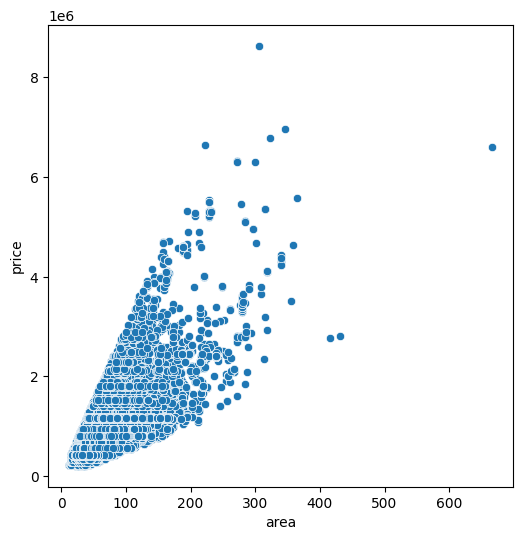

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_pl, x='area', y='price')
plt.show()

In [44]:
df_pl.sort_values(by='price').tail()

id                 developer                  investment   number  \
71586  71587            LV DEVELOPMENT         Apartamenty Chorzów       L3   
66522  66523  PB Górski Sp. z o.o. SKA  Bulvar Apartments - etap I  A.10.19   
45085  45086           Moderna Holding            Bank Polski 1929       U4   
61555  61556      modernBau Sp. z o.o.                 Willa Fiore        1   
76140  76141           MFC Development             Libra Residence       U1   

         area    price country  voivodeship      city        lng        lat  \
71586  666.28  6600000      PL      śląskie   Chorzów  18.933729  50.302971   
66522  222.84  6640000      PL    pomorskie    Gdańsk  18.607371  54.409078   
45085  323.27  6790000      PL    pomorskie    Gdynia  18.537162  54.519817   
61555  346.43  6960000      PL  mazowieckie  Warszawa  20.965170  52.276940   
76140  305.05  8630000      PL  małopolskie    Kraków  19.945660  50.059060   

       floor  floors  balcony  loggia  terrace  garden      price_m2  \
71586    0.0       1      0.0     0.0      0.0     0.0   9905.745332   
66522    9.0       1      0.0     0.0      0.0     0.0  29797.163884   
45085    0.0       1      0.0     0.0      0.0     0.0  21004.114208   
61555    0.0       1      0.0     0.0      0.0     0.0  20090.638801   
76140    0.0       1      0.0     0.0      0.0     0.0  28290.444189   

       is_commercial  is_detached  
71586          False        False  
66522          False        False  
45085           True        False  
61555          False        False  
76140           True        False

In [45]:
df_pl[df_pl['investment'] == "Libra Residence"]

id        developer       investment  number    area    price  \
5508    5509  MFC Development  Libra Residence  B2.M10   46.97  1320000   
64610  64611  MFC Development  Libra Residence  B2.M13   43.16  1190000   
71591  71592  MFC Development  Libra Residence  B2.M30   43.52  1280000   
76140  76141  MFC Development  Libra Residence      U1  305.05  8630000   
76209  76210  MFC Development  Libra Residence  B2.M15   46.82  1290000   
80745  80746  MFC Development  Libra Residence  B2.M12   52.64  1420000   

      country  voivodeship    city        lng        lat  floor  floors  \
5508       PL  małopolskie  Kraków  19.945838  50.058769    1.0       1   
64610      PL  małopolskie  Kraków  19.945838  50.058769    2.0       1   
71591      PL  małopolskie  Kraków  19.945838  50.058769    4.0       1   
76140      PL  małopolskie  Kraków  19.945660  50.059060    0.0       1   
76209      PL  małopolskie  Kraków  19.945838  50.058769    2.0       1   
80745      PL  małopolskie  Kraków  19.945838  50.058769    1.0       1   

       balcony  loggia  terrace  garden      price_m2  is_commercial  \
5508      0.00     0.0      0.0     0.0  28103.044496          False   
64610     0.00     0.0      0.0     0.0  27571.825765          False   
71591     0.00     0.0      0.0     0.0  29411.764706          False   
76140     0.00     0.0      0.0     0.0  28290.444189           True   
76209     1.84     0.0      0.0     0.0  27552.328065          False   
80745     0.00     0.0      0.0     0.0  26975.683891          False   

       is_detached  
5508         False  
64610        False  
71591        False  
76140        False  
76209        False  
80745        False

Najlepszy w Krakowie stosunek metrażu do ceny

In [46]:
df_pl[(df_pl['city'] == "Kraków") & (df_pl['area'].between(30,60))].sort_values(by='price_m2').head(10)

id            developer                      investment number  \
22721  22722            ATAL S.A.               Skwer Harmonia II  2A.25   
22722  22723            ATAL S.A.               Skwer Harmonia II  1B.19   
71319  71320            ATAL S.A.               Skwer Harmonia II  1A.29   
85540  85541              Develia  Słoneczne Miasteczko - etap XV  B.060   
70020  70021              Develia  Słoneczne Miasteczko - etap XV  B.033   
47732  47733              Develia  Słoneczne Miasteczko - etap XV  B.055   
43473  43474  Grupa Wawel Service                  Enklawa Bukowa   A1.1   
43474  43475  Grupa Wawel Service                  Enklawa Bukowa  A1.26   
85541  85542              Develia  Słoneczne Miasteczko - etap XV  C.025   
52265  52266  Grupa Wawel Service                  Enklawa Bukowa  A0.12   

        area   price country  voivodeship    city        lng        lat  \
22721  52.17  430000      PL  małopolskie  Kraków  20.042673  50.039997   
22722  45.76  430000      PL  małopolskie  Kraków  20.042673  50.039997   
71319  58.64  600000      PL  małopolskie  Kraków  20.042673  50.039997   
85540  57.22  630000      PL  małopolskie  Kraków  20.058996  50.020939   
70020  59.12  660000      PL  małopolskie  Kraków  20.058996  50.020939   
47732  57.22  640000      PL  małopolskie  Kraków  20.058996  50.020939   
43473  57.19  650000      PL  małopolskie  Kraków  20.049396  50.039382   
43474  57.19  650000      PL  małopolskie  Kraków  20.049396  50.039382   
85541  55.16  630000      PL  małopolskie  Kraków  20.058996  50.020939   
52265  58.27  670000      PL  małopolskie  Kraków  20.049396  50.039382   

       floor  floors  balcony  loggia  terrace  garden      price_m2  \
22721    2.0       1     5.81     0.0      0.0    0.00   8242.284838   
22722    3.0       1     4.68     0.0      0.0    0.00   9396.853147   
71319    2.0       1     4.61     0.0      0.0    0.00  10231.923602   
85540    1.0       1     6.53     0.0      0.0    0.00  11010.136316   
70020    2.0       1     5.20     0.0      0.0    0.00  11163.734777   
47732    0.0       1     0.00     0.0      0.0   50.53  11184.900384   
43473    1.0       1     0.00     0.0      0.0    0.00  11365.623361   
43474    1.0       1     0.00     0.0      0.0    0.00  11365.623361   
85541    1.0       1     5.20     0.0      0.0    0.00  11421.319797   
52265    0.0       1     0.00     0.0      0.0    0.00  11498.198044   

       is_commercial  is_detached  
22721          False        False  
22722          False        False  
71319          False        False  
85540          False        False  
70020          False        False  
47732          False        False  
43473          False        False  
43474          False        False  
85541          False        False  
52265          False        False

Część druga

In [47]:
df = pd.read_parquet('ceny_mieszkan_v1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91470 entries, 0 to 91469
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             91470 non-null  int64  
 1   developer      91470 non-null  object 
 2   investment     91470 non-null  object 
 3   number         91470 non-null  object 
 4   area           91470 non-null  float64
 5   price          91470 non-null  int64  
 6   country        91470 non-null  object 
 7   voivodeship    91470 non-null  object 
 8   city           91470 non-null  object 
 9   lng            91470 non-null  float64
 10  lat            91470 non-null  float64
 11  floor          91470 non-null  float64
 12  floors         91470 non-null  int64  
 13  balcony        91470 non-null  float64
 14  loggia         91470 non-null  float64
 15  terrace        91470 non-null  float64
 16  garden         91470 non-null  float64
 17  price_m2       91470 non-null  float64
 18  is_com

id                              developer       investment   number   area  \
0   2            Dekpol Deweloper Sp. z o.o.         Granaria  5.3.217  67.05   
1   3            Dekpol Deweloper Sp. z o.o.         Granaria  5.3.217  67.05   
2   8  Assethome – Przedstawiciel Dewelopera   Harmony Resort   H.4.15  72.94   
3   9                            ASBUD Group  Towarowa Square    C.099  69.57   
4  10                            ASBUD Group  Towarowa Square    E.039  71.55   

     price country         voivodeship       city        lng        lat  \
0  1950000      PL           pomorskie     Gdańsk  18.658644  54.348504   
1  1950000      PL           pomorskie     Gdańsk  18.658672  54.348509   
2  1950000      PL  zachodniopomorskie  Kołobrzeg  15.598388  54.184976   
3  1950000      PL         mazowieckie   Warszawa  20.982282  52.229196   
4  1950000      PL         mazowieckie   Warszawa  20.982282  52.229196   

   floor  floors  balcony  loggia  terrace  garden      price_m2  \
0    3.0       1     0.00     0.0      0.0     0.0  29082.774049   
1    3.0       1     0.00     0.0      0.0     0.0  29082.774049   
2    4.0       1     0.00     0.0      0.0     0.0  26734.302166   
3    7.0       1     5.89     0.0      0.0     0.0  28029.322984   
4    2.0       1     7.43     0.0      0.0     0.0  27253.668763   

   is_commercial  is_detached  
0          False        False  
1          False        False  
2          False        False  
3          False        False  
4          False        False

Wykres ceny za metr w zależności od powierzchni

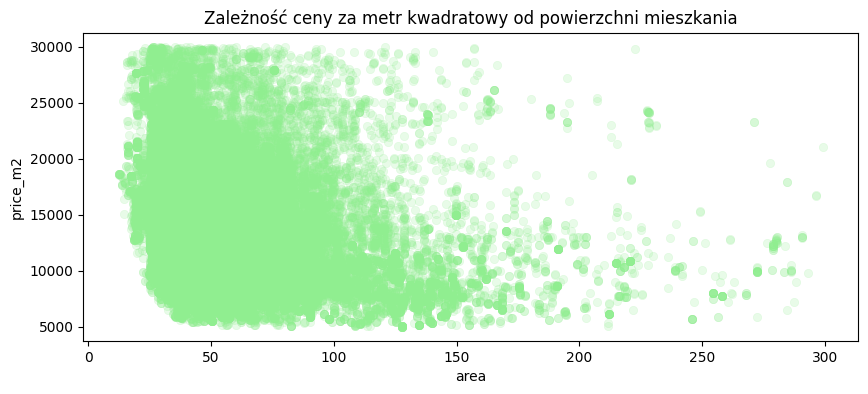

In [48]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df[df['area'] < 300], x='area', y='price_m2', alpha=0.2, edgecolor=None, facecolor='lightgreen')
plt.title('Zależność ceny za metr kwadratowy od powierzchni mieszkania')
plt.show()

Wykres jest nieczytelny ze względu na to że mamy bardzo dużo wartości - np. 45.12 m^2, 45.17 m^2 itd... - ujednolicmy do wartości całkowitych i weźmy średnią

In [49]:
plot_df = df[df['area'] < 300]
plot_df['area'] = plot_df['area'].round(0)
plot_df = plot_df.groupby('area').agg(
    mean_price_m2=('price_m2', 'mean'),
    count_area=('price_m2', 'count')
).reset_index()

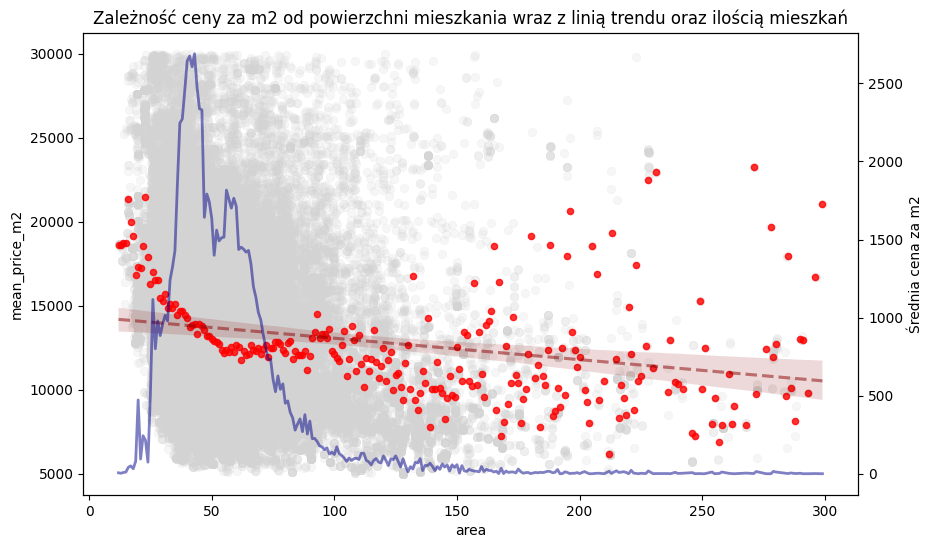

In [138]:
plt.figure(figsize=(10,6))
ax1 = plt.gca()
ax2 = ax1.twinx()

sns.scatterplot(data=df[df['area'] < 300], x='area', y='price_m2', facecolor='lightgray', edgecolor=None, alpha=0.2, ax=ax1)

sns.regplot(
    data=plot_df, x='area', y='mean_price_m2',
    line_kws={'color':'darkred', 'linestyle':'--', 'alpha':0.5},
    scatter_kws={'color':'red', 's':20}, ax=ax1
)

sns.lineplot(data=plot_df, x='area', y='count_area', ax=ax2, color='darkblue', alpha=0.5, linewidth=2)

plt.xlabel('Powierzchnia w m2')
plt.ylabel('Średnia cena za m2')
plt.title('Zależność ceny za m2 od powierzchni mieszkania wraz z linią trendu oraz ilością mieszkań')

plt.show()

Widzimy, że stosunkowo szybko maleje średnia cena metra kwadratowego (do mieszkań wielkości około 55-60 metrów kwadratowych - przytnij zakres prezentowanych danych, zobaczysz), a później - póki jeszcze jest dużo ofert - cena się stabilizuje. Przy większych mieszkaniach (ponad 80-90 metrów kwadratowych) reguły przestają obowiązywać

Sprawdźmy jak na cenę wpływa piętro

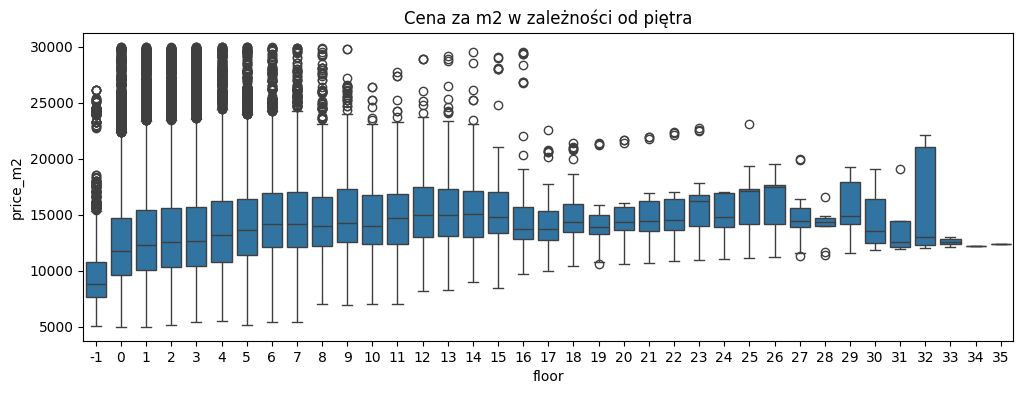

In [51]:
df['floor'] = df['floor'].astype(int)
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='floor', y='price_m2')
plt.title('Cena za m2 w zależności od piętra')
plt.show()

Bardzo dużo jest wartości odstających dla prawie wszystkich pięter (do 10) - może to wynikać z różnych cen w różnych miastach. Zapewne gdyby wybrać jedynie jedno miast (albo nawet jedną dzielnicę - w szczególności ma to znaczenie w dużych miastach) wartości odstających byłoby mniej. Widzimy jednak, że im wyżej tym drożej (do pewnego momentu - później zaczyna się wariactwo wynikające z małej próby)

In [52]:
df['floors'].value_counts() # są to kondygnacje czyli np. parking podziemny, część mieszkalna, piwnica, itd...

floors
1    85978
2     4724
3      691
5       76
4        1
Name: count, dtype: int64

In [53]:
df['floor'].value_counts()

floor
 1     18290
 2     16607
 0     15069
 3     14021
 4      9819
 5      5911
 6      3408
-1      2535
 7      2029
 8      1184
 9       693
 10      498
 11      310
 12      211
 13      186
 14      155
 15      114
 16       74
 17       61
 18       43
 22       28
 19       28
 23       27
 20       26
 24       25
 21       25
 25       24
 26       21
 27       11
 28        9
 29        8
 30        7
 32        5
 31        4
 33        2
 34        1
 35        1
Name: count, dtype: int64

Dodajemy maksymalne piętro dla konkretnej inwestycji.

In [54]:
df["max_floor"] = df.groupby(['city', 'developer','investment'])['floor'].transform("max")
df

id                              developer  \
0          2            Dekpol Deweloper Sp. z o.o.   
1          3            Dekpol Deweloper Sp. z o.o.   
2          8  Assethome – Przedstawiciel Dewelopera   
3          9                            ASBUD Group   
4         10                            ASBUD Group   
...      ...                                    ...   
91465  99164                          CL Inwestycje   
91466  99165                          CL Inwestycje   
91467  99168                                  BOZ-2   
91468  99169        Rogowski Development Sp. z o.o.   
91469  99170        Rogowski Development Sp. z o.o.   

                             investment   number   area    price country  \
0                              Granaria  5.3.217  67.05  1950000      PL   
1                              Granaria  5.3.217  67.05  1950000      PL   
2                        Harmony Resort   H.4.15  72.94  1950000      PL   
3                       Towarowa Square    C.099  69.57  1950000      PL   
4                       Towarowa Square    E.039  71.55  1950000      PL   
...                                 ...      ...    ...      ...     ...   
91465  Osiedle Kochanowskiego - Gliwice     A.39  42.35   420000      PL   
91466  Osiedle Kochanowskiego - Gliwice     C.14  40.26   420000      PL   
91467                     Strażacka 54G       62  42.39   420000      PL   
91468          Apartamenty Róg Młynowej      237  32.63   420000      PL   
91469          Apartamenty Róg Młynowej      251  32.63   420000      PL   

              voivodeship       city        lng  ...  floor  floors  balcony  \
0               pomorskie     Gdańsk  18.658644  ...      3       1     0.00   
1               pomorskie     Gdańsk  18.658672  ...      3       1     0.00   
2      zachodniopomorskie  Kołobrzeg  15.598388  ...      4       1     0.00   
3             mazowieckie   Warszawa  20.982282  ...      7       1     5.89   
4             mazowieckie   Warszawa  20.982282  ...      2       1     7.43   
...                   ...        ...        ...  ...    ...     ...      ...   
91465             śląskie    Gliwice  18.667949  ...      3       1     2.80   
91466             śląskie    Gliwice  18.667949  ...      1       1     2.80   
91467        podkarpackie    Rzeszów  22.009140  ...      0       1     0.00   
91468           podlaskie  Białystok  23.145021  ...      2       1     0.00   
91469           podlaskie  Białystok  23.145021  ...      3       1     0.00   

       loggia  terrace  garden      price_m2  is_commercial  is_detached  \
0         0.0      0.0     0.0  29082.774049          False        False   
1         0.0      0.0     0.0  29082.774049          False        False   
2         0.0      0.0     0.0  26734.302166          False        False   
3         0.0      0.0     0.0  28029.322984          False        False   
4         0.0      0.0     0.0  27253.668763          False        False   
...       ...      ...     ...           ...            ...          ...   
91465     0.0      0.0     0.0   9917.355372          False        False   
91466     0.0      0.0     0.0  10432.190760          False        False   
91467     0.0      0.0     0.0   9907.997169          False        False   
91468     0.0      0.0     0.0  12871.590561          False        False   
91469     0.0      0.0     0.0  12871.590561          False        False   

       max_floor  
0              6  
1              6  
2              4  
3              9  
4              9  
...          ...  
91465          7  
91466          7  
91467          6  
91468          8  
91469          8  

[91470 rows x 21 columns]

Sprawdzamy czy liczba pięter w budynku ma wpływ na cenę

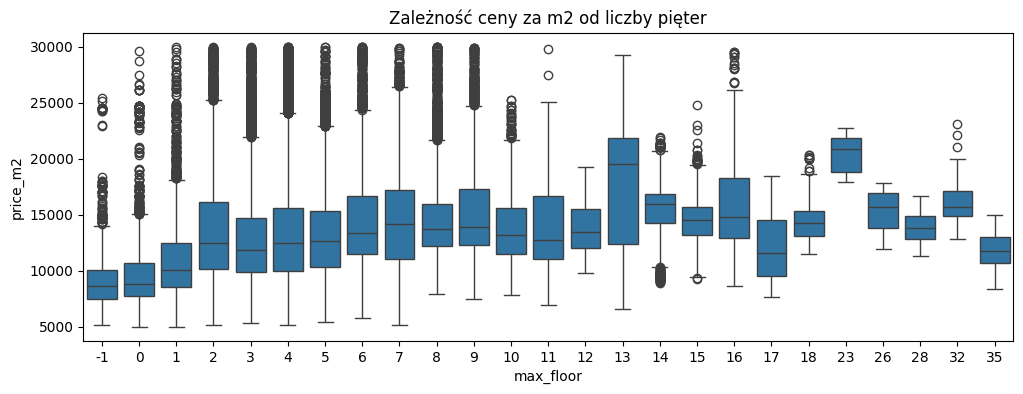

In [137]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='max_floor', y='price_m2')
plt.title('Zależność ceny za m2 od liczby pięter')
plt.show()

Sprawdźmy czy ma znaczenie że lokal jest na ostatnim piętrze

In [56]:
df['highest_floor'] = df['floor'] == df['max_floor']
df

id                              developer  \
0          2            Dekpol Deweloper Sp. z o.o.   
1          3            Dekpol Deweloper Sp. z o.o.   
2          8  Assethome – Przedstawiciel Dewelopera   
3          9                            ASBUD Group   
4         10                            ASBUD Group   
...      ...                                    ...   
91465  99164                          CL Inwestycje   
91466  99165                          CL Inwestycje   
91467  99168                                  BOZ-2   
91468  99169        Rogowski Development Sp. z o.o.   
91469  99170        Rogowski Development Sp. z o.o.   

                             investment   number   area    price country  \
0                              Granaria  5.3.217  67.05  1950000      PL   
1                              Granaria  5.3.217  67.05  1950000      PL   
2                        Harmony Resort   H.4.15  72.94  1950000      PL   
3                       Towarowa Square    C.099  69.57  1950000      PL   
4                       Towarowa Square    E.039  71.55  1950000      PL   
...                                 ...      ...    ...      ...     ...   
91465  Osiedle Kochanowskiego - Gliwice     A.39  42.35   420000      PL   
91466  Osiedle Kochanowskiego - Gliwice     C.14  40.26   420000      PL   
91467                     Strażacka 54G       62  42.39   420000      PL   
91468          Apartamenty Róg Młynowej      237  32.63   420000      PL   
91469          Apartamenty Róg Młynowej      251  32.63   420000      PL   

              voivodeship       city        lng  ...  floors  balcony  loggia  \
0               pomorskie     Gdańsk  18.658644  ...       1     0.00     0.0   
1               pomorskie     Gdańsk  18.658672  ...       1     0.00     0.0   
2      zachodniopomorskie  Kołobrzeg  15.598388  ...       1     0.00     0.0   
3             mazowieckie   Warszawa  20.982282  ...       1     5.89     0.0   
4             mazowieckie   Warszawa  20.982282  ...       1     7.43     0.0   
...                   ...        ...        ...  ...     ...      ...     ...   
91465             śląskie    Gliwice  18.667949  ...       1     2.80     0.0   
91466             śląskie    Gliwice  18.667949  ...       1     2.80     0.0   
91467        podkarpackie    Rzeszów  22.009140  ...       1     0.00     0.0   
91468           podlaskie  Białystok  23.145021  ...       1     0.00     0.0   
91469           podlaskie  Białystok  23.145021  ...       1     0.00     0.0   

       terrace  garden      price_m2  is_commercial  is_detached  max_floor  \
0          0.0     0.0  29082.774049          False        False          6   
1          0.0     0.0  29082.774049          False        False          6   
2          0.0     0.0  26734.302166          False        False          4   
3          0.0     0.0  28029.322984          False        False          9   
4          0.0     0.0  27253.668763          False        False          9   
...        ...     ...           ...            ...          ...        ...   
91465      0.0     0.0   9917.355372          False        False          7   
91466      0.0     0.0  10432.190760          False        False          7   
91467      0.0     0.0   9907.997169          False        False          6   
91468      0.0     0.0  12871.590561          False        False          8   
91469      0.0     0.0  12871.590561          False        False          8   

       highest_floor  
0              False  
1              False  
2               True  
3              False  
4              False  
...              ...  
91465          False  
91466          False  
91467          False  
91468          False  
91469          False  

[91470 rows x 22 columns]

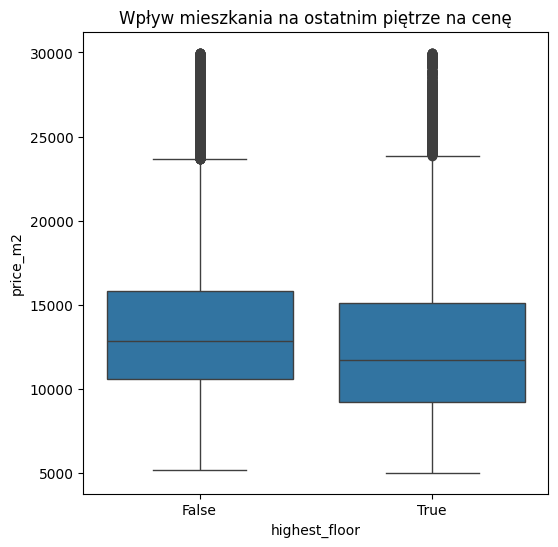

In [57]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='highest_floor', y='price_m2')
plt.title('Wpływ mieszkania na ostatnim piętrze na cenę')
plt.show()

Mieszkania pod samym dachem są odrobinę tańsze (precyzyjniej: mediany się różnią, test statystyczny pokazałby czy ta hipoteza jest prawdziwa), jak wynika z wykresu, co jest dla mnie osobiście zaskakującym wnioskiem. Z jednej strony nikt nie tupie nad głową, a z drugiej - może od dachu gorąco albo może przeciekać?

Na cenę może mieć (i zapewne ma) wpływ balkon, loggia, taras oraz ogródek. Przygotujmy odpowiednie cechy dodatkowe i serię przekrojów przez dane.

In [58]:
df['has_balcony'] = df['balcony'].apply(lambda x: 1 if x>0 else 0)
df['has_loggia'] = df['loggia'].apply(lambda x: 1 if x>0 else 0)
df['has_terrace'] = df['terrace'].apply(lambda x: 1 if x>0 else 0)
df['has_garden'] = df['garden'].apply(lambda x: 1 if x>0 else 0)

df['balcony_and_loggia'] = df['has_balcony'] + df['has_loggia']
df['terrace_and_garden'] = df['has_terrace'] + df['has_garden']

df.groupby('has_balcony')['price_m2'].median()

for c in df.columns[-6:]:
    print(df.groupby(c).agg(
    median_price_m2=('price_m2', 'median'),
    count=('price_m2', 'count')
    ).to_markdown(), end='\n\n')

|   has_balcony |   median_price_m2 |   count |
|--------------:|------------------:|--------:|
|             0 |           12570.3 |   57503 |
|             1 |           12815.7 |   33967 |

|   has_loggia |   median_price_m2 |   count |
|-------------:|------------------:|--------:|
|            0 |           12634.4 |   84873 |
|            1 |           12923.2 |    6597 |

|   has_terrace |   median_price_m2 |   count |
|--------------:|------------------:|--------:|
|             0 |           12706.3 |   85363 |
|             1 |           12272   |    6107 |

|   has_garden |   median_price_m2 |   count |
|-------------:|------------------:|--------:|
|            0 |           12790.4 |   82430 |
|            1 |           11532.8 |    9040 |

|   balcony_and_loggia |   median_price_m2 |   count |
|---------------------:|------------------:|--------:|
|                    0 |           12506.8 |   51379 |
|                    1 |           12865.5 |   39618 |
|               

Gdzie jest najdrożej - policzmy średnią w województwach

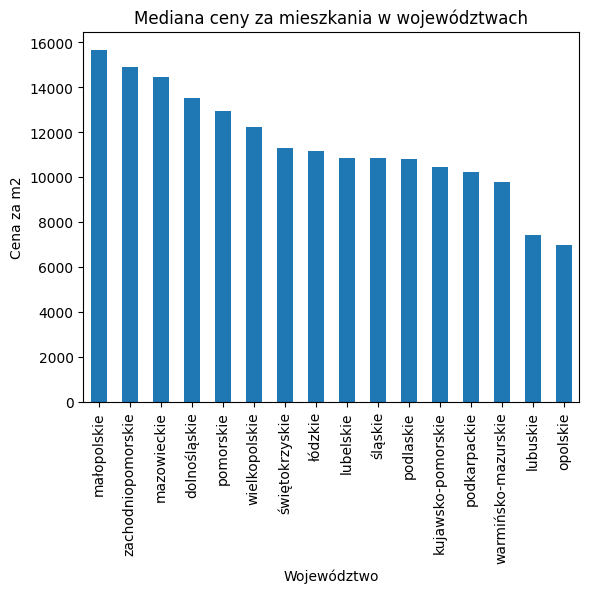

In [59]:
voivo_price = df.groupby('voivodeship')['price_m2'].median().sort_values(ascending=False)
voivo_price.plot(kind='bar')
plt.title('Mediana ceny za mieszkania w województwach')
plt.xlabel('Województwo')
plt.ylabel('Cena za m2')
plt.show()

Zobaczmy jak to ma się do miast

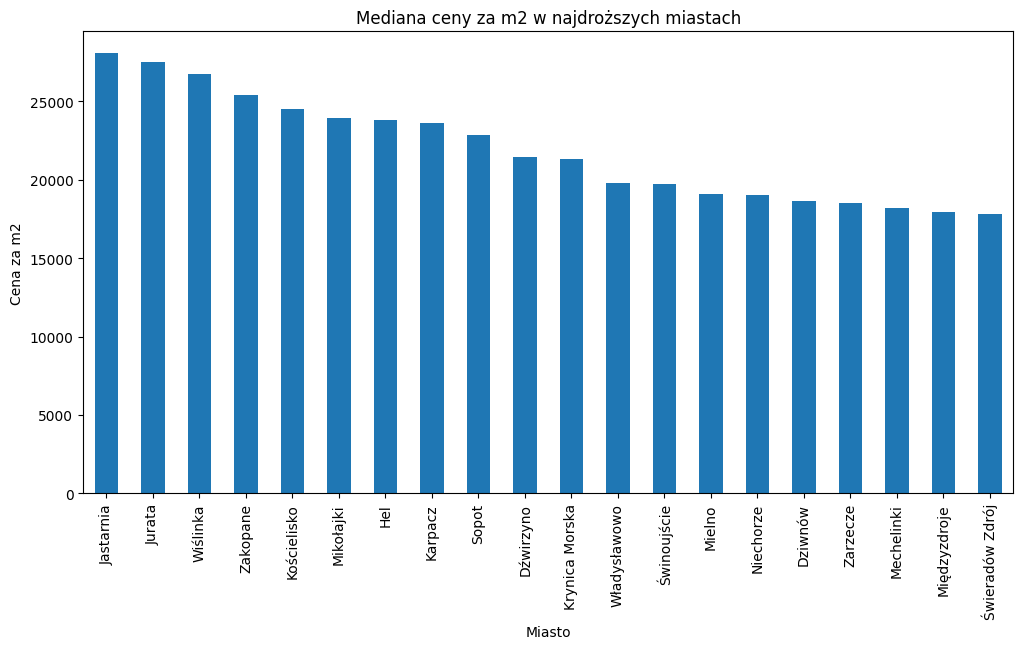

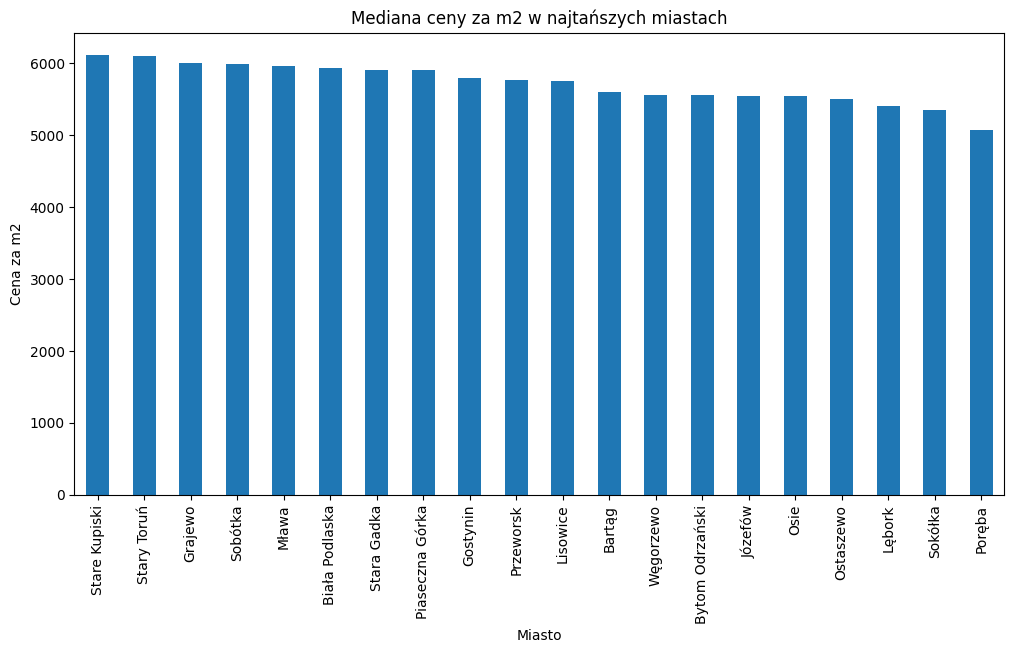

In [60]:
df['city'].nunique() # dużo miast, trzeba będzie ograniczyć do max 20
expensive_cities = df.groupby('city')['price_m2'].median().nlargest(20)
cheap_cities = df.groupby('city')['price_m2'].median().nsmallest(20).sort_values(ascending=False)

plt.figure(figsize=(12,6))
expensive_cities.plot(kind='bar')
plt.title('Mediana ceny za m2 w najdroższych miastach')
plt.xlabel('Miasto')
plt.ylabel('Cena za m2')
plt.show()

plt.figure(figsize=(12,6))
cheap_cities.plot(kind='bar')
plt.title('Mediana ceny za m2 w najtańszych miastach')
plt.xlabel('Miasto')
plt.ylabel('Cena za m2')
plt.show()

Zróbmy przedziały powierzchni mieszkań i zobaczmy czy metraż wpływa na cenę za m2

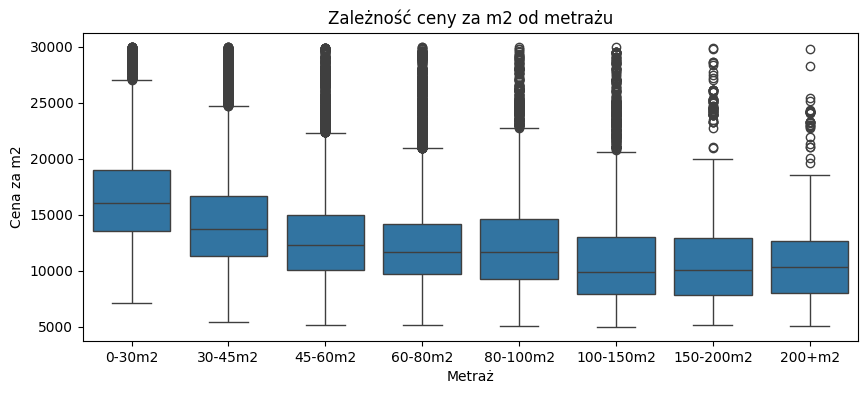

In [61]:
bins = [0, 30, 45, 60, 80, 100, 150, 200, 10_000]
labels = ["0-30m2",
    "30-45m2",
    "45-60m2",
    "60-80m2",
    "80-100m2",
    "100-150m2",
    "150-200m2",
    "200+m2",]
df['size_segment'] = pd.cut(df['area'], bins=bins, labels=labels)
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='size_segment', y='price_m2')
plt.title('Zależność ceny za m2 od metrażu')
plt.xlabel('Metraż')
plt.ylabel('Cena za m2')
plt.show()

Mediana (połowa mieszkań jest droższa niż mediana, połowa tańsza) dla tych najmniejszych jest w przybliżeniu podobna niż trzeci kwartyl (góra pudełka) tych z kolejnego przedziału
widać też, że 75% mieszkań (III-kwartyl) o wielkości 45-60m2 kosztuje mniej niż połowa mieszkań o wielkości do 30m2 (góra pudełka nr 3 niżej niż belka w pudełku 1)
Te wnioski widać od razu na wykresie, ale trzeba się tego wykresu nauczyć. Mamy też powtórkę obserwacji z pierwszego dzisiaj wykresu - cena maleje do okolic 60m2, a segmenty (to co ponad 100m2) są tańsze niż mieszkania.

Sprawdźmy jeszcze parę zależności:
- najdroźsi deweloperzy
- czy wielkość balkonu ma znaczenie? a posiadanie ogródka?
- jak to jest dla segmentów (floor == -1)? może mają jakieś inne zależności?

In [62]:
# boxplot: oś x - wojewodztwo, oś y - mediana cen deweloperów
print(df.groupby('developer')['price_m2'].median().reset_index(name='median_price_m2').sort_values(by='median_price_m2', ascending=False).head(10).to_markdown(), end='\n\n')

|     | developer                      |   median_price_m2 |
|----:|:-------------------------------|------------------:|
| 674 | Monea Properties               |           29623.1 |
| 736 | Olivia Home Sp. z o.o.         |           29454.8 |
| 580 | Lions Estate                   |           29254.6 |
| 606 | MJM 11 Sp. z o.o.              |           28727.8 |
| 732 | Oaza Mokotów                   |           28448.3 |
| 214 | Ciril                          |           28424.5 |
| 784 | POC Partners Polska Sp. z o.o. |           28154.6 |
| 670 | Moja Jastarnia Sp. z o.o.      |           28063.1 |
| 349 | Fracthon                       |           27723.4 |
| 426 | Grupa Pro Urba                 |           27578.9 |



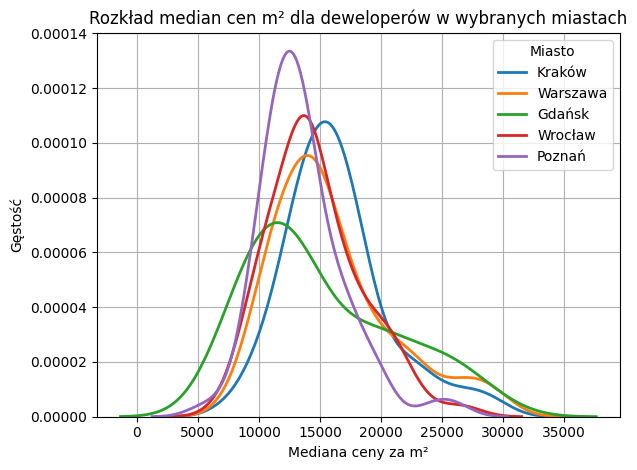

In [63]:
# mediana dla deweloperów w: Kraków, Warszawa, Gdańsk, Wrocław, Poznań
cities = ['Kraków', 'Warszawa', 'Gdańsk', 'Wrocław', 'Poznań']
df_cities = df[df['city'].isin(cities)]
for c in cities:
    df2 = df_cities[df_cities['city'] == c].groupby('developer')['price_m2'].median().reset_index()
    sns.kdeplot(df2['price_m2'], label=c, linewidth=2)
plt.title("Rozkład median cen m² dla deweloperów w wybranych miastach")
plt.xlabel("Mediana ceny za m²")
plt.ylabel("Gęstość")
plt.legend(title="Miasto")
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# mediana ceny dla deweloperów w miastach za m2
# najpierw zgrupujemy po deweloperze i mieście
df_grouped = df_cities.groupby(['city', 'developer'])['price_m2'].median().reset_index()
# teraz policzymy mediane
dev_median_price = df_grouped.groupby('city')['price_m2'].median().reset_index()
dev_median_price.sort_values(by='price_m2', ascending=False)

city      price_m2
1    Kraków  15775.635408
3  Warszawa  14687.941121
4   Wrocław  14064.552666
0    Gdańsk  13766.401377
2    Poznań  12716.512350

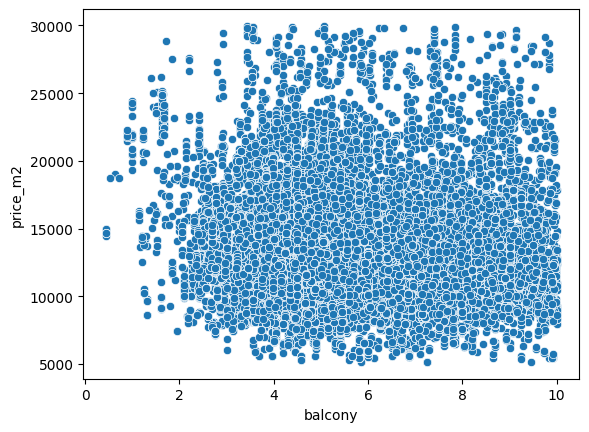

In [65]:
# wielkość balkonu
sns.scatterplot(data=df[df['balcony'].between(0.1,10)], x='balcony', y='price_m2')
plt.show()

In [66]:
df.to_parquet('ceny_mieszkan_v2.parquet', index=False)

Część 3

In [67]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic

In [68]:
df = pd.read_parquet('ceny_mieszkan_v2.parquet')
df.head()

id                              developer       investment   number   area  \
0   2            Dekpol Deweloper Sp. z o.o.         Granaria  5.3.217  67.05   
1   3            Dekpol Deweloper Sp. z o.o.         Granaria  5.3.217  67.05   
2   8  Assethome – Przedstawiciel Dewelopera   Harmony Resort   H.4.15  72.94   
3   9                            ASBUD Group  Towarowa Square    C.099  69.57   
4  10                            ASBUD Group  Towarowa Square    E.039  71.55   

     price country         voivodeship       city        lng  ...  \
0  1950000      PL           pomorskie     Gdańsk  18.658644  ...   
1  1950000      PL           pomorskie     Gdańsk  18.658672  ...   
2  1950000      PL  zachodniopomorskie  Kołobrzeg  15.598388  ...   
3  1950000      PL         mazowieckie   Warszawa  20.982282  ...   
4  1950000      PL         mazowieckie   Warszawa  20.982282  ...   

   is_detached  max_floor  highest_floor  has_balcony  has_loggia  \
0        False          6          False            0           0   
1        False          6          False            0           0   
2        False          4           True            0           0   
3        False          9          False            1           0   
4        False          9          False            1           0   

   has_terrace  has_garden  balcony_and_loggia  terrace_and_garden  \
0            0           0                   0                   0   
1            0           0                   0                   0   
2            0           0                   0                   0   
3            0           0                   1                   0   
4            0           0                   1                   0   

   size_segment  
0       60-80m2  
1       60-80m2  
2       60-80m2  
3       60-80m2  
4       60-80m2  

[5 rows x 29 columns]

In [135]:
# ustalamy położenie środka mapy
m = folium.Map(location=[df["lat"].mean(), df["lng"].mean()], zoom_start=7)

heat_data = [
    [row["lat"], row["lng"], row["price_m2"]]
    for _, row in df.iterrows()
]

HeatMap(heat_data).add_to(m)
m

In [133]:
gminy_map = gpd.read_file("00_jednostki_administracyjne/A03_Granice_gmin.shp", encoding="cp1250")

gminy_map = gminy_map.to_crs(epsg=2180)

gminy_map['centroid'] = gminy_map.geometry.centroid
gminy_map['centroid'] = gminy_map['centroid'].to_crs(epsg=4326)

warszawa_centroid = gminy_map[gminy_map["JPT_KOD_JE"] == "1465011"]["centroid"].values[0]

specjalne_map = gpd.read_file("00_jednostki_administracyjne/A05_Granice_jednostek_ewidencyjnych.shp", encoding="cp1250")

warszawa_map = specjalne_map[specjalne_map["JPT_KOD_JE"].str.startswith("1465")][["JPT_KOD_JE", "JPT_NAZWA_", "geometry"]]
warszawa_map = warszawa_map.to_crs(epsg=2180)
warszawa_map['centroid'] = warszawa_centroid

mapa_gmin_df = pd.concat(
    [
        gminy_map[gminy_map["JPT_KOD_JE"] != "1465011"][
            ["JPT_KOD_JE", "JPT_NAZWA_", "geometry", "centroid"]
        ],
        warszawa_map,
        ],
        axis=0,
)

mapa_gmin_df["gmina_area"] = mapa_gmin_df['geometry'].area
mapa_gmin_df['gmina_area'] = mapa_gmin_df['gmina_area'] / 1_000_000

mapa_gmin_df = mapa_gmin_df.to_crs(epsg=4326)

mapa_gmin_df.head()

JPT_KOD_JE             JPT_NAZWA_  \
0    1210133       Piwniczna-ZdrĂłj   
1    1218093               Wadowice   
2    2411072     Pietrowice Wielkie   
3    3005023  Grodzisk Wielkopolski   
4    2405021              Pyskowice   

                                            geometry  \
0  POLYGON ((20.75448 49.48064, 20.75479 49.48062...   
1  POLYGON ((19.51590 49.83905, 19.51544 49.83896...   
2  POLYGON ((18.10283 50.06274, 18.10249 50.06274...   
3  POLYGON ((16.31695 52.28271, 16.31756 52.28240...   
4  POLYGON ((18.60206 50.40179, 18.60226 50.40185...   

                                        centroid  gmina_area  
0    POINT (20.74267652913739 49.43923752918799)  126.326235  
1   POINT (19.512716363763595 49.86853886773217)  112.674155  
2  POINT (18.099382516628037 50.099107765584264)   67.880202  
3  POINT (16.337031470194606 52.239912671049105)  134.589718  
4   POINT (18.60960402182912 50.388960467041564)   31.184308

In [71]:
mapa_gmin_df["woj_teryt"] = mapa_gmin_df['JPT_KOD_JE'].apply(lambda x: x[:2])

woj_teryt_map = {
    "dolnośląskie": "02",
    "kujawsko-pomorskie": "04",
    "lubelskie": "06",
    "lubuskie": "08",
    "łódzkie": "10",
    "małopolskie": "12",
    "mazowieckie": "14",
    "opolskie": "16",
    "podkarpackie": "18",
    "podlaskie": "20",
    "pomorskie": "22",
    "śląskie": "24",
    "świętokrzyskie": "26",
    "warmińsko-mazurskie": "28",
    "wielkopolskie": "30",
    "zachodniopomorskie": "32",
}

In [72]:
def get_teryt_from_coordinates(map_df, lat, lng, woj):
    point = Point(lng, lat)
    woj_map = map_df[map_df["woj_teryt"] == woj_teryt_map[woj]]

    for idx,row in woj_map.iterrows():
        if row['geometry'].contains(point):
            return row["JPT_KOD_JE"]
    return None

In [73]:
df["teryt"] = [
    get_teryt_from_coordinates(mapa_gmin_df, lat, lng, woj)
    for lat, lng, woj in zip(df["lat"], df["lng"], df["voivodeship"])
]

In [74]:
df = pd.merge(df, mapa_gmin_df, how='inner', left_on='teryt', right_on="JPT_KOD_JE")
df = df.drop(columns=["JPT_KOD_JE"])
df = df.rename(columns={"JPT_NAZWA_":"gmina_nazwa", "teryt":"gmina_teryt"})

In [75]:
df["distance_to_city_center"] = df.apply(
    lambda row: geodesic(
        (row["lat"], row["lng"]), (row["centroid"].y, row["centroid"].x)
    ).km,
    axis=1
)

df["distance_to_city_center_round"] = df["distance_to_city_center"].round()
df["distance_to_city_center_round"] = df["distance_to_city_center_round"].round().astype(int)
df

id                    developer        investment     number  \
0          2  Dekpol Deweloper Sp. z o.o.          Granaria    5.3.217   
1          3  Dekpol Deweloper Sp. z o.o.          Granaria    5.3.217   
2         35                    Alfa Corp  Leśna Dolina IIA         B2   
3         70                 Murapol S.A.    Murapol Scarpa   1.C.5.06   
4         89         Marvipol Development    Motława Garden      C3.M4   
...      ...                          ...               ...        ...   
91465  85836           EMPEDE Sp. z o. o.   Domy w Brzozach         E1   
91466  71439           Varitex Sp. z o.o.  Osiedle Zastawna  I.II.B-10   
91467  81365           Varitex Sp. z o.o.  Osiedle Zastawna  I.II.B-10   
91468  86235           Ostoja Development       Brzozowa 33          B   
91469  88071           Ostoja Development       Brzozowa 33          B   

         area    price country  voivodeship         city        lng  ...  \
0       67.05  1950000      PL    pomorskie       Gdańsk  18.658644  ...   
1       67.05  1950000      PL    pomorskie       Gdańsk  18.658672  ...   
2      156.40  1950000      PL    pomorskie       Gdańsk  18.567889  ...   
3       80.44  1620000      PL    pomorskie       Gdańsk  18.615439  ...   
4      117.70  1620000      PL    pomorskie       Gdańsk  18.657809  ...   
...       ...      ...     ...          ...          ...        ...  ...   
91465  100.46   630000      PL    pomorskie       Glincz  18.345354  ...   
91466  102.44   600000      PL      łódzkie  Stara Gadka  19.440507  ...   
91467  102.44   610000      PL      łódzkie  Stara Gadka  19.440507  ...   
91468  146.20  1450000      PL  mazowieckie        Laski  20.851171  ...   
91469  146.20  1460000      PL  mazowieckie        Laski  20.851171  ...   

       terrace_and_garden  size_segment  gmina_teryt  gmina_nazwa  \
0                       0       60-80m2      2261011      GdaĹ„sk   
1                       0       60-80m2      2261011      GdaĹ„sk   
2                       0     150-200m2      2261011      GdaĹ„sk   
3                       1      80-100m2      2261011      GdaĹ„sk   
4                       1     100-150m2      2261011      GdaĹ„sk   
...                   ...           ...          ...          ...   
91465                   0     100-150m2      2205083      Ĺ»ukowo   
91466                   0     100-150m2      1006103       RzgĂłw   
91467                   0     100-150m2      1006103       RzgĂłw   
91468                   1     100-150m2      1432022     Izabelin   
91469                   1     100-150m2      1432022     Izabelin   

                                                geometry  \
0      POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
1      POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
2      POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
3      POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
4      POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
...                                                  ...   
91465  POLYGON ((18.45954 54.31292, 18.45809 54.31283...   
91466  POLYGON ((19.57050 51.63980, 19.57046 51.63981...   
91467  POLYGON ((19.57050 51.63980, 19.57046 51.63981...   
91468  POLYGON ((20.83952 52.29052, 20.83953 52.29048...   
91469  POLYGON ((20.83952 52.29052, 20.83953 52.29048...   

                                           centroid  gmina_area  woj_teryt  \
0       POINT (18.77414587781283 54.41677941433947)  682.005967         22   
1       POINT (18.77414587781283 54.41677941433947)  682.005967         22   
2       POINT (18.77414587781283 54.41677941433947)  682.005967         22   
3       POINT (18.77414587781283 54.41677941433947)  682.005967         22   
4       POINT (18.77414587781283 54.41677941433947)  682.005967         22   
...                                             ...         ...        ...   
91465  POINT (18.388322651513896 54.35195816563493)  163.816146         22   
91466   POINT (19.50203420553473 5

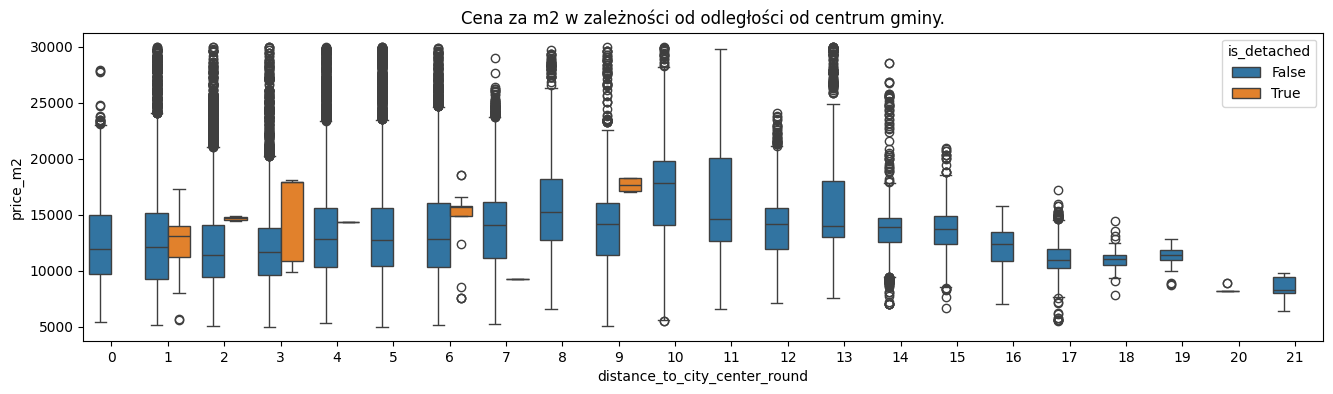

In [76]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='distance_to_city_center_round', y='price_m2', hue='is_detached')
plt.title('Cena za m2 w zależności od odległości od centrum gminy.')
plt.show()

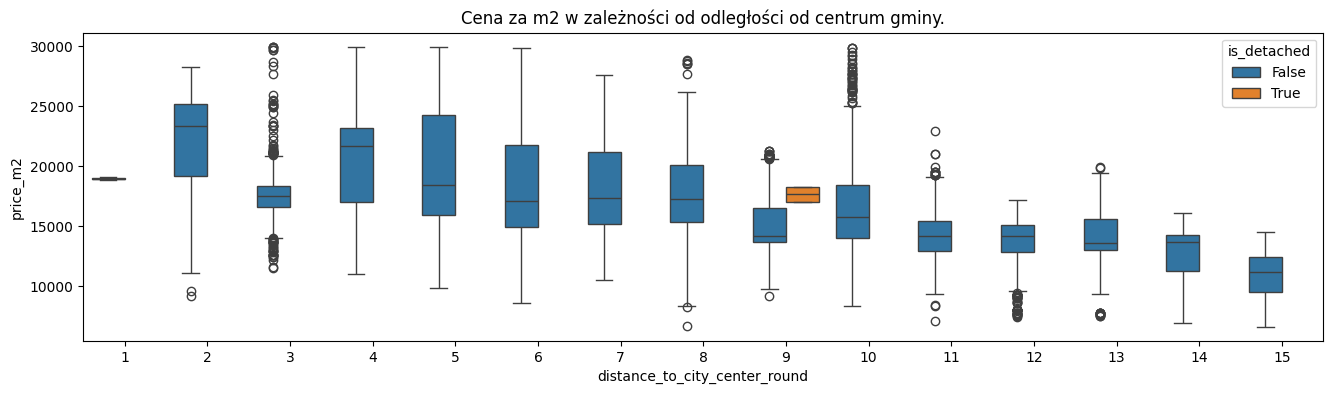

In [77]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df[df['city'] == "Warszawa"], x='distance_to_city_center_round', y='price_m2', hue='is_detached')
plt.title('Cena za m2 w zależności od odległości od centrum gminy.')
plt.show()

In [78]:
mean_by_gmina_df = df.groupby("gmina_teryt", as_index=False)["price_m2"].mean()
mean_by_gmina_df["price_m2"] = mean_by_gmina_df["price_m2"].round(-1)

mean_by_gmina_df = pd.merge(
    mean_by_gmina_df, mapa_gmin_df, how='inner', left_on='gmina_teryt', right_on='JPT_KOD_JE'
)

mean_by_gmina_gdf = gpd.GeoDataFrame(
    mean_by_gmina_df[['gmina_teryt', 'price_m2', 'JPT_NAZWA_', 'geometry']], geometry='geometry'
)

mean_by_gmina_json = mean_by_gmina_gdf.to_crs(epsg=4326).to_json()


In [145]:
m = folium.Map(
    location = [df["lat"].mean(), df['lng'].mean()], 
    zoom_start=7, tiles=None,
)

folium.TileLayer("CartoDB positron", control=False).add_to(m)

folium.Choropleth(
    geo_data=mean_by_gmina_json,
    name='Średnia cena za m2',
    data=mean_by_gmina_df,
    columns=["gmina_teryt", "price_m2"],
    key_on="feature.properties.gmina_teryt",
    fill_color="YlOrBr",
    fill_opacity=0.8,
    line_opacity=0,
    legend_name="Średnia cena za m2",
    smooth_factor=0,
    bins=20
).add_to(m)

folium.GeoJson(
    mean_by_gmina_json,
    name="Gminy",
    style_function=lambda x: {
        # przezroczyste wypełnienie:
        "fillOpacity": 0,
        # minimalne obramowanie:
        "weight": 0.1,
    },
    tooltip=folium.GeoJsonTooltip(
     # kolumny do wyświetlenia:
        fields=["JPT_NAZWA_", "price_m2"],
        # etykiety w popupie:
        aliases=["Nazwa gminy: ", "Cena za m²: "],
        localize=True,
        sticky=False,
        labels=True,
        # tu jak w CSS:
        style="background-color:white;color:black;font-weight:bold;",
    ),
).add_to(m)
m.save("mapa.html")

In [80]:
df['gmina_teryt'] = df['gmina_teryt'].apply(lambda x: x.replace("_", ""))
df["powiat_teryt"] = df["gmina_teryt"].apply(lambda s: s[:4] + "000")
df["gmina_rodzaj"] = df["gmina_teryt"].apply(lambda s: int(s[-1]))

In [81]:
mapa_gmin_df["gmina_teryt"] = mapa_gmin_df["JPT_KOD_JE"].apply(lambda s: s.replace("_", ""))
mapa_gmin_df["powiat_teryt"] = mapa_gmin_df["gmina_teryt"].apply(lambda s: s[:4] + "000")
mapa_gmin_df["gmina_rodzaj"] = mapa_gmin_df["gmina_teryt"].apply(lambda s: int(s[-1]))

# usunięcie zbędnych kolumn i zmiana nazw
mapa_gmin_df = mapa_gmin_df.drop(columns=["JPT_KOD_JE"])
mapa_gmin_df = mapa_gmin_df.rename(columns={"JPT_NAZWA_": "gmina_nazwa"})

Za pomocą danych z GUS sprawdzimy czy liczba mieszkańców wpływa na cenę nieruchomości.

In [82]:
ludnosc = pd.read_csv("LUDN_2137_CTAB_20250423212731.csv",
         sep=";",
         dtype={"Kod": str}
)
ludnosc.columns = ['gmina_teryt', 'gmina_nazwa', 'ludnosc', 'foo']
ludnosc

gmina_teryt            gmina_nazwa   ludnosc  foo
0        0000000                 POLSKA  37636508  NaN
1        0200000           DOLNOŚLĄSKIE   2879271  NaN
2        0201000   Powiat bolesławiecki     87642  NaN
3        0201011        Bolesławiec (1)     37055  NaN
4        0201022        Bolesławiec (2)     15267  NaN
...          ...                    ...       ...  ...
4241     3261011           Koszalin (1)    105540  NaN
4242     3262000     Powiat m. Szczecin    389066  NaN
4243     3262011           Szczecin (1)    389066  NaN
4244     3263000  Powiat m. Świnoujście     38904  NaN
4245     3263011        Świnoujście (1)     38904  NaN

[4246 rows x 4 columns]

In [83]:
plot_data = pd.merge(
    df[['gmina_teryt', 'price_m2', 'gmina_nazwa']], ludnosc[ludnosc.columns[:-1]], on='gmina_teryt'
)
plot_data

gmina_teryt      price_m2 gmina_nazwa_x gmina_nazwa_y  ludnosc
0         2261011  29082.774049       GdaĹ„sk    Gdańsk (1)   487371
1         2261011  29082.774049       GdaĹ„sk    Gdańsk (1)   487371
2         2261011  12468.030691       GdaĹ„sk    Gdańsk (1)   487371
3         2261011  20139.234212       GdaĹ„sk    Gdańsk (1)   487371
4         2261011  13763.806287       GdaĹ„sk    Gdańsk (1)   487371
...           ...           ...           ...           ...      ...
91465     2205083   6271.152698       Ĺ»ukowo    Żukowo (3)    50982
91466     1006103   5857.087075        RzgĂłw     Rzgów (3)    11347
91467     1006103   5954.705193        RzgĂłw     Rzgów (3)    11347
91468     1432022   9917.920657      Izabelin  Izabelin (2)    10791
91469     1432022   9986.320109      Izabelin  Izabelin (2)    10791

[91470 rows x 5 columns]

In [84]:
plot_data = plot_data.groupby('gmina_teryt', as_index = False).aggregate(
    {'ludnosc':'mean',
     'price_m2':'mean'}
)
plot_data

gmina_teryt   ludnosc      price_m2
0       0206011    4208.0  17935.390013
1       0206041    5776.0  18821.434523
2       0208051    5937.0  14991.896317
3       0210021    3960.0  17449.154506
4       0211011   67620.0   9801.374691
..          ...       ...           ...
291     3213032    7596.0  13631.448872
292     3214011   66604.0   9154.506892
293     3261011  105540.0   8816.628034
294     3262011  389066.0  12830.972841
295     3263011   38904.0  19627.216037

[296 rows x 3 columns]

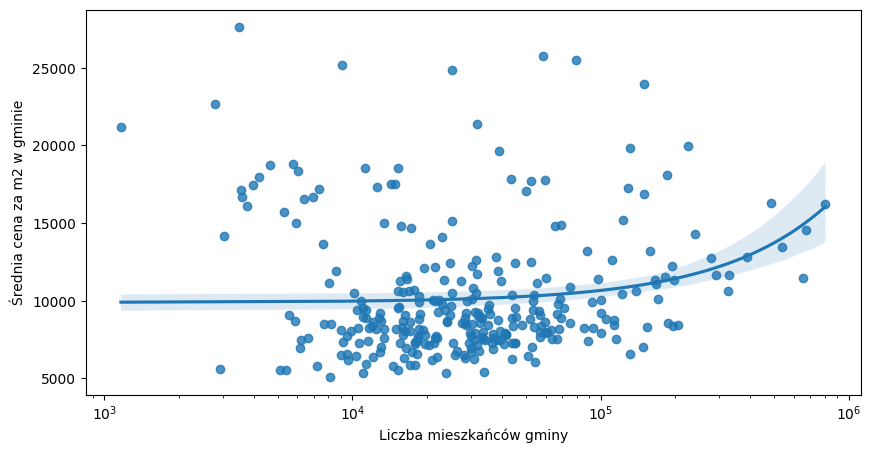

In [85]:
plt.figure(figsize=(10,5))
sns.regplot(data=plot_data, x='ludnosc', y='price_m2')
plt.xscale("log")
plt.xlabel("Liczba mieszkańców gminy")
plt.ylabel("Średnia cena za m2 w gminie")
plt.show()


I właściwie jest tak, że im ludniejsza gmina tym więcej kosztują mieszkania. Ale bardzo ludnych gmin mamy tylko kilka, są to największe miasta, więc zależność raczej nie dziwi.

Zobaczmy jak wpływają zarobki w gminach.

In [86]:
wynagrodzenia = pd.read_csv("WYNA_2497_CTAB_20250423215404.csv", sep=";", dtype={"Kod":str}, decimal=",")
wynagrodzenia.columns = ["powiat_teryt", "powiat_nazwa", "wynagrodzenie", "foo"]
wynagrodzenia.head()

powiat_teryt           powiat_nazwa  wynagrodzenie  foo
0      0000000                 POLSKA        7595.30  NaN
1      0200000           DOLNOŚLĄSKIE        7850.30  NaN
2      0201000   Powiat bolesławiecki        6871.28  NaN
3      0202000  Powiat dzierżoniowski        6459.49  NaN
4      0203000       Powiat głogowski        6660.00  NaN

In [87]:
plot_data = pd.merge(df[["powiat_teryt", "price_m2"]], wynagrodzenia[["powiat_teryt", "wynagrodzenie"]], on="powiat_teryt")
plot_data = plot_data.groupby("powiat_teryt", as_index=False).aggregate(
    {"wynagrodzenie":"mean",
     "price_m2":"mean"}
)
plot_data.head()

powiat_teryt  wynagrodzenie      price_m2
0      0206000        6287.20  18554.837060
1      0208000        6527.23  14991.896317
2      0210000        6215.31  17449.154506
3      0211000       12804.03   9801.374691
4      0214000        6496.00   9471.048462

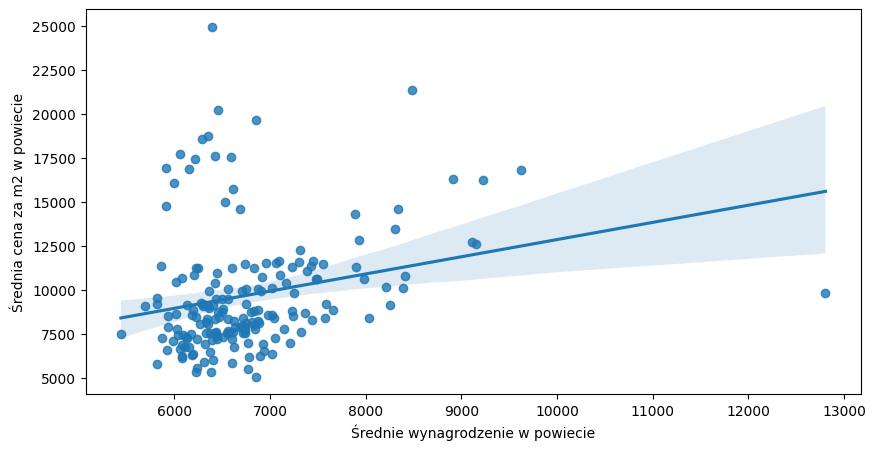

In [88]:
plt.figure(figsize=(10,5))
sns.regplot(data=plot_data, x="wynagrodzenie", y="price_m2")
plt.xlabel("Średnie wynagrodzenie w powiecie")
plt.ylabel("Średnia cena za m2 w powiecie")
plt.show()

Obetnijmy outliery.

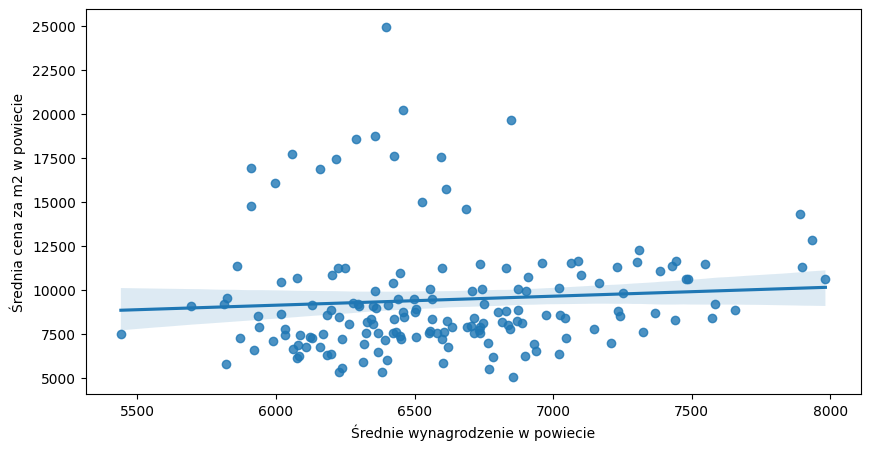

In [89]:
plt.figure(figsize=(10,5))
sns.regplot(data=plot_data[plot_data["wynagrodzenie"] < 8000], x="wynagrodzenie", y="price_m2")
plt.xlabel("Średnie wynagrodzenie w powiecie")
plt.ylabel("Średnia cena za m2 w powiecie")
plt.show()

Słaba tendencja.

In [90]:
mapa_gmin_df = pd.merge(
    mapa_gmin_df,
    ludnosc[["gmina_teryt", "ludnosc"]],
    how="left",
    on="gmina_teryt"
)

mapa_gmin_df = pd.merge(
    mapa_gmin_df,
    wynagrodzenia[["powiat_teryt", "wynagrodzenie"]],
    how="left",
    on="powiat_teryt"
)

mapa_gmin_df.head()

gmina_nazwa                                           geometry  \
0       Piwniczna-ZdrĂłj  POLYGON ((20.75448 49.48064, 20.75479 49.48062...   
1               Wadowice  POLYGON ((19.51590 49.83905, 19.51544 49.83896...   
2     Pietrowice Wielkie  POLYGON ((18.10283 50.06274, 18.10249 50.06274...   
3  Grodzisk Wielkopolski  POLYGON ((16.31695 52.28271, 16.31756 52.28240...   
4              Pyskowice  POLYGON ((18.60206 50.40179, 18.60226 50.40185...   

                                        centroid  gmina_area woj_teryt  \
0    POINT (20.74267652913739 49.43923752918799)  126.326235        12   
1   POINT (19.512716363763595 49.86853886773217)  112.674155        12   
2  POINT (18.099382516628037 50.099107765584264)   67.880202        24   
3  POINT (16.337031470194606 52.239912671049105)  134.589718        30   
4   POINT (18.60960402182912 50.388960467041564)   31.184308        24   

  gmina_teryt powiat_teryt  gmina_rodzaj  ludnosc  wynagrodzenie  
0     1210133      1210000             3   9941.0        5909.25  
1     1218093      1218000             3  36475.0        6048.26  
2     2411072      2411000             2   6544.0        7283.63  
3     3005023      3005000             3  20372.0        6233.27  
4     2405021      2405000             1  17236.0        6931.46

In [93]:
#mapa_gmin_df.drop(columns="ludnosc_y", inplace=True)
#mapa_gmin_df.rename(columns={"ludnosc_x":"ludnosc"}, inplace=True)
mapa_gmin_df.head()

gmina_nazwa                                           geometry  \
0       Piwniczna-ZdrĂłj  POLYGON ((20.75448 49.48064, 20.75479 49.48062...   
1               Wadowice  POLYGON ((19.51590 49.83905, 19.51544 49.83896...   
2     Pietrowice Wielkie  POLYGON ((18.10283 50.06274, 18.10249 50.06274...   
3  Grodzisk Wielkopolski  POLYGON ((16.31695 52.28271, 16.31756 52.28240...   
4              Pyskowice  POLYGON ((18.60206 50.40179, 18.60226 50.40185...   

                                        centroid  gmina_area woj_teryt  \
0    POINT (20.74267652913739 49.43923752918799)  126.326235        12   
1   POINT (19.512716363763595 49.86853886773217)  112.674155        12   
2  POINT (18.099382516628037 50.099107765584264)   67.880202        24   
3  POINT (16.337031470194606 52.239912671049105)  134.589718        30   
4   POINT (18.60960402182912 50.388960467041564)   31.184308        24   

  gmina_teryt powiat_teryt  gmina_rodzaj  ludnosc  wynagrodzenie  
0     1210133      1210000             3   9941.0        5909.25  
1     1218093      1218000             3  36475.0        6048.26  
2     2411072      2411000             2   6544.0        7283.63  
3     3005023      3005000             3  20372.0        6233.27  
4     2405021      2405000             1  17236.0        6931.46

In [94]:
df = pd.merge(
    df,
    wynagrodzenia[["powiat_teryt", "wynagrodzenie"]],
    on="powiat_teryt",
)

df = pd.merge(
    df,
    ludnosc[["gmina_teryt", "ludnosc"]],
    on="gmina_teryt",
)

df.head()

id                    developer        investment    number    area  \
0   2  Dekpol Deweloper Sp. z o.o.          Granaria   5.3.217   67.05   
1   3  Dekpol Deweloper Sp. z o.o.          Granaria   5.3.217   67.05   
2  35                    Alfa Corp  Leśna Dolina IIA        B2  156.40   
3  70                 Murapol S.A.    Murapol Scarpa  1.C.5.06   80.44   
4  89         Marvipol Development    Motława Garden     C3.M4  117.70   

     price country voivodeship    city        lng  ...  \
0  1950000      PL   pomorskie  Gdańsk  18.658644  ...   
1  1950000      PL   pomorskie  Gdańsk  18.658672  ...   
2  1950000      PL   pomorskie  Gdańsk  18.567889  ...   
3  1620000      PL   pomorskie  Gdańsk  18.615439  ...   
4  1620000      PL   pomorskie  Gdańsk  18.657809  ...   

                                            geometry  \
0  POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
1  POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
2  POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
3  POLYGON ((18.93486 54.31731, 18.93437 54.31533...   
4  POLYGON ((18.93486 54.31731, 18.93437 54.31533...   

                                      centroid  gmina_area  woj_teryt  \
0  POINT (18.77414587781283 54.41677941433947)  682.005967         22   
1  POINT (18.77414587781283 54.41677941433947)  682.005967         22   
2  POINT (18.77414587781283 54.41677941433947)  682.005967         22   
3  POINT (18.77414587781283 54.41677941433947)  682.005967         22   
4  POINT (18.77414587781283 54.41677941433947)  682.005967         22   

   distance_to_city_center  distance_to_city_center_round  powiat_teryt  \
0                10.680589                             11       2261000   
1                10.678933                             11       2261000   
2                14.902876                             15       2261000   
3                12.717979                             13       2261000   
4                11.865477                             12       2261000   

   gmina_rodzaj  wynagrodzenie  ludnosc  
0             1        8915.97   487371  
1             1        8915.97   487371  
2             1        8915.97   487371  
3             1        8915.97   487371  
4             1        8915.97   487371  

[5 rows x 41 columns]

In [95]:
plot_data = df.groupby("gmina_teryt", as_index=False)[["gmina_area", "price_m2"]].mean()
plot_data.head()

gmina_teryt  gmina_area      price_m2
0     0206011   37.985034  17935.390013
1     0206041   75.451710  18821.434523
2     0208051   17.206404  14991.896317
3     0210021   20.726597  17449.154506
4     0211011   40.741684   9801.374691

czy istnieje zależność ceny metra od powierzchni gminy?

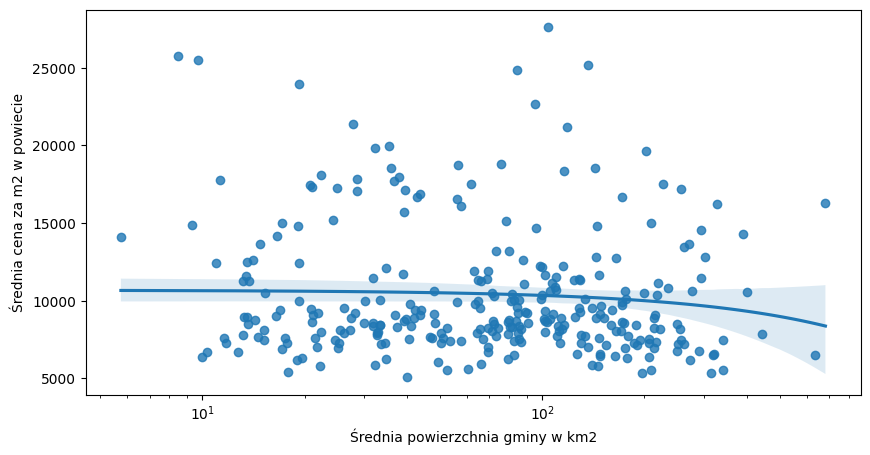

In [96]:
plt.figure(figsize=(10,5))
sns.regplot(data=plot_data, x="gmina_area", y="price_m2")
plt.xlabel("Średnia powierzchnia gminy w km2")
plt.ylabel("Średnia cena za m2 w powiecie")
plt.xscale("log")
plt.show()

In [97]:
df.drop(columns=["geometry", "centroid"]).to_parquet("ceny_mieszkan_v3.parquet")

In [98]:
slownik_gmin_obrys_gdf = mapa_gmin_df.drop(columns="centroid")
slownik_gmin_obrys_gdf = gpd.GeoDataFrame(slownik_gmin_obrys_gdf, geometry="geometry")
slownik_gmin_obrys_gdf.to_file("slownik_gmin_obrys.gpkg")


In [99]:
slownik_gmin_centrum_gdf = mapa_gmin_df.drop(
    columns=[
        "geometry",
        "gmina_area",
        "powiat_teryt",
        "gmina_rodzaj",
        "ludnosc",
        "wynagrodzenie",
    ]
).rename(columns={"centroid": "geometry"})

slownik_gmin_centrum_gdf = gpd.GeoDataFrame(
    slownik_gmin_centrum_gdf,
    geometry="geometry",
    crs="EPSG:4326"
)

slownik_gmin_centrum_gdf.to_file("slownik_gmin_centrum.gpkg")

Część 4

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

In [101]:
df = pd.read_parquet('ceny_mieszkan_v3.parquet')
df.head()

id                    developer        investment    number    area  \
0   2  Dekpol Deweloper Sp. z o.o.          Granaria   5.3.217   67.05   
1   3  Dekpol Deweloper Sp. z o.o.          Granaria   5.3.217   67.05   
2  35                    Alfa Corp  Leśna Dolina IIA        B2  156.40   
3  70                 Murapol S.A.    Murapol Scarpa  1.C.5.06   80.44   
4  89         Marvipol Development    Motława Garden     C3.M4  117.70   

     price country voivodeship    city        lng  ...  gmina_teryt  \
0  1950000      PL   pomorskie  Gdańsk  18.658644  ...      2261011   
1  1950000      PL   pomorskie  Gdańsk  18.658672  ...      2261011   
2  1950000      PL   pomorskie  Gdańsk  18.567889  ...      2261011   
3  1620000      PL   pomorskie  Gdańsk  18.615439  ...      2261011   
4  1620000      PL   pomorskie  Gdańsk  18.657809  ...      2261011   

   gmina_nazwa  gmina_area  woj_teryt  distance_to_city_center  \
0      GdaĹ„sk  682.005967         22                10.680589   
1      GdaĹ„sk  682.005967         22                10.678933   
2      GdaĹ„sk  682.005967         22                14.902876   
3      GdaĹ„sk  682.005967         22                12.717979   
4      GdaĹ„sk  682.005967         22                11.865477   

   distance_to_city_center_round  powiat_teryt  gmina_rodzaj  wynagrodzenie  \
0                             11       2261000             1        8915.97   
1                             11       2261000             1        8915.97   
2                             15       2261000             1        8915.97   
3                             13       2261000             1        8915.97   
4                             12       2261000             1        8915.97   

   ludnosc  
0   487371  
1   487371  
2   487371  
3   487371  
4   487371  

[5 rows x 39 columns]

In [102]:
df_numeric = df.select_dtypes(include="number")
df_numeric.columns

Index(['id', 'area', 'price', 'lng', 'lat', 'floor', 'floors', 'balcony',
       'loggia', 'terrace', 'garden', 'price_m2', 'max_floor', 'has_balcony',
       'has_loggia', 'has_terrace', 'has_garden', 'balcony_and_loggia',
       'terrace_and_garden', 'gmina_area', 'distance_to_city_center',
       'distance_to_city_center_round', 'gmina_rodzaj', 'wynagrodzenie',
       'ludnosc'],
      dtype='object')

Dodajmy gęstość zaludnienia oraz czy mieszkanie jest na ostatnim piętrze

In [103]:
df_numeric['gestosc_zaludnienia'] = df_numeric['gmina_area'] / df_numeric['ludnosc']
df_numeric['last_floor'] = (df_numeric['floor'] == df_numeric['max_floor']).astype("int")
df_numeric.head()

id    area    price        lng        lat  floor  floors  balcony  loggia  \
0   2   67.05  1950000  18.658644  54.348504      3       1      0.0     0.0   
1   3   67.05  1950000  18.658672  54.348509      3       1      0.0     0.0   
2  35  156.40  1950000  18.567889  54.358179      0       2      0.0     0.0   
3  70   80.44  1620000  18.615439  54.349900      5       1      0.0     0.0   
4  89  117.70  1620000  18.657809  54.334621      1       1      0.0     0.0   

   terrace  ...  balcony_and_loggia  terrace_and_garden  gmina_area  \
0     0.00  ...                   0                   0  682.005967   
1     0.00  ...                   0                   0  682.005967   
2     0.00  ...                   0                   0  682.005967   
3    34.18  ...                   0                   1  682.005967   
4    23.11  ...                   0                   1  682.005967   

   distance_to_city_center  distance_to_city_center_round  gmina_rodzaj  \
0                10.680589                             11             1   
1                10.678933                             11             1   
2                14.902876                             15             1   
3                12.717979                             13             1   
4                11.865477                             12             1   

   wynagrodzenie  ludnosc  gestosc_zaludnienia  last_floor  
0        8915.97   487371             0.001399           0  
1        8915.97   487371             0.001399           0  
2        8915.97   487371             0.001399           1  
3        8915.97   487371             0.001399           0  
4        8915.97   487371             0.001399           1  

[5 rows x 27 columns]

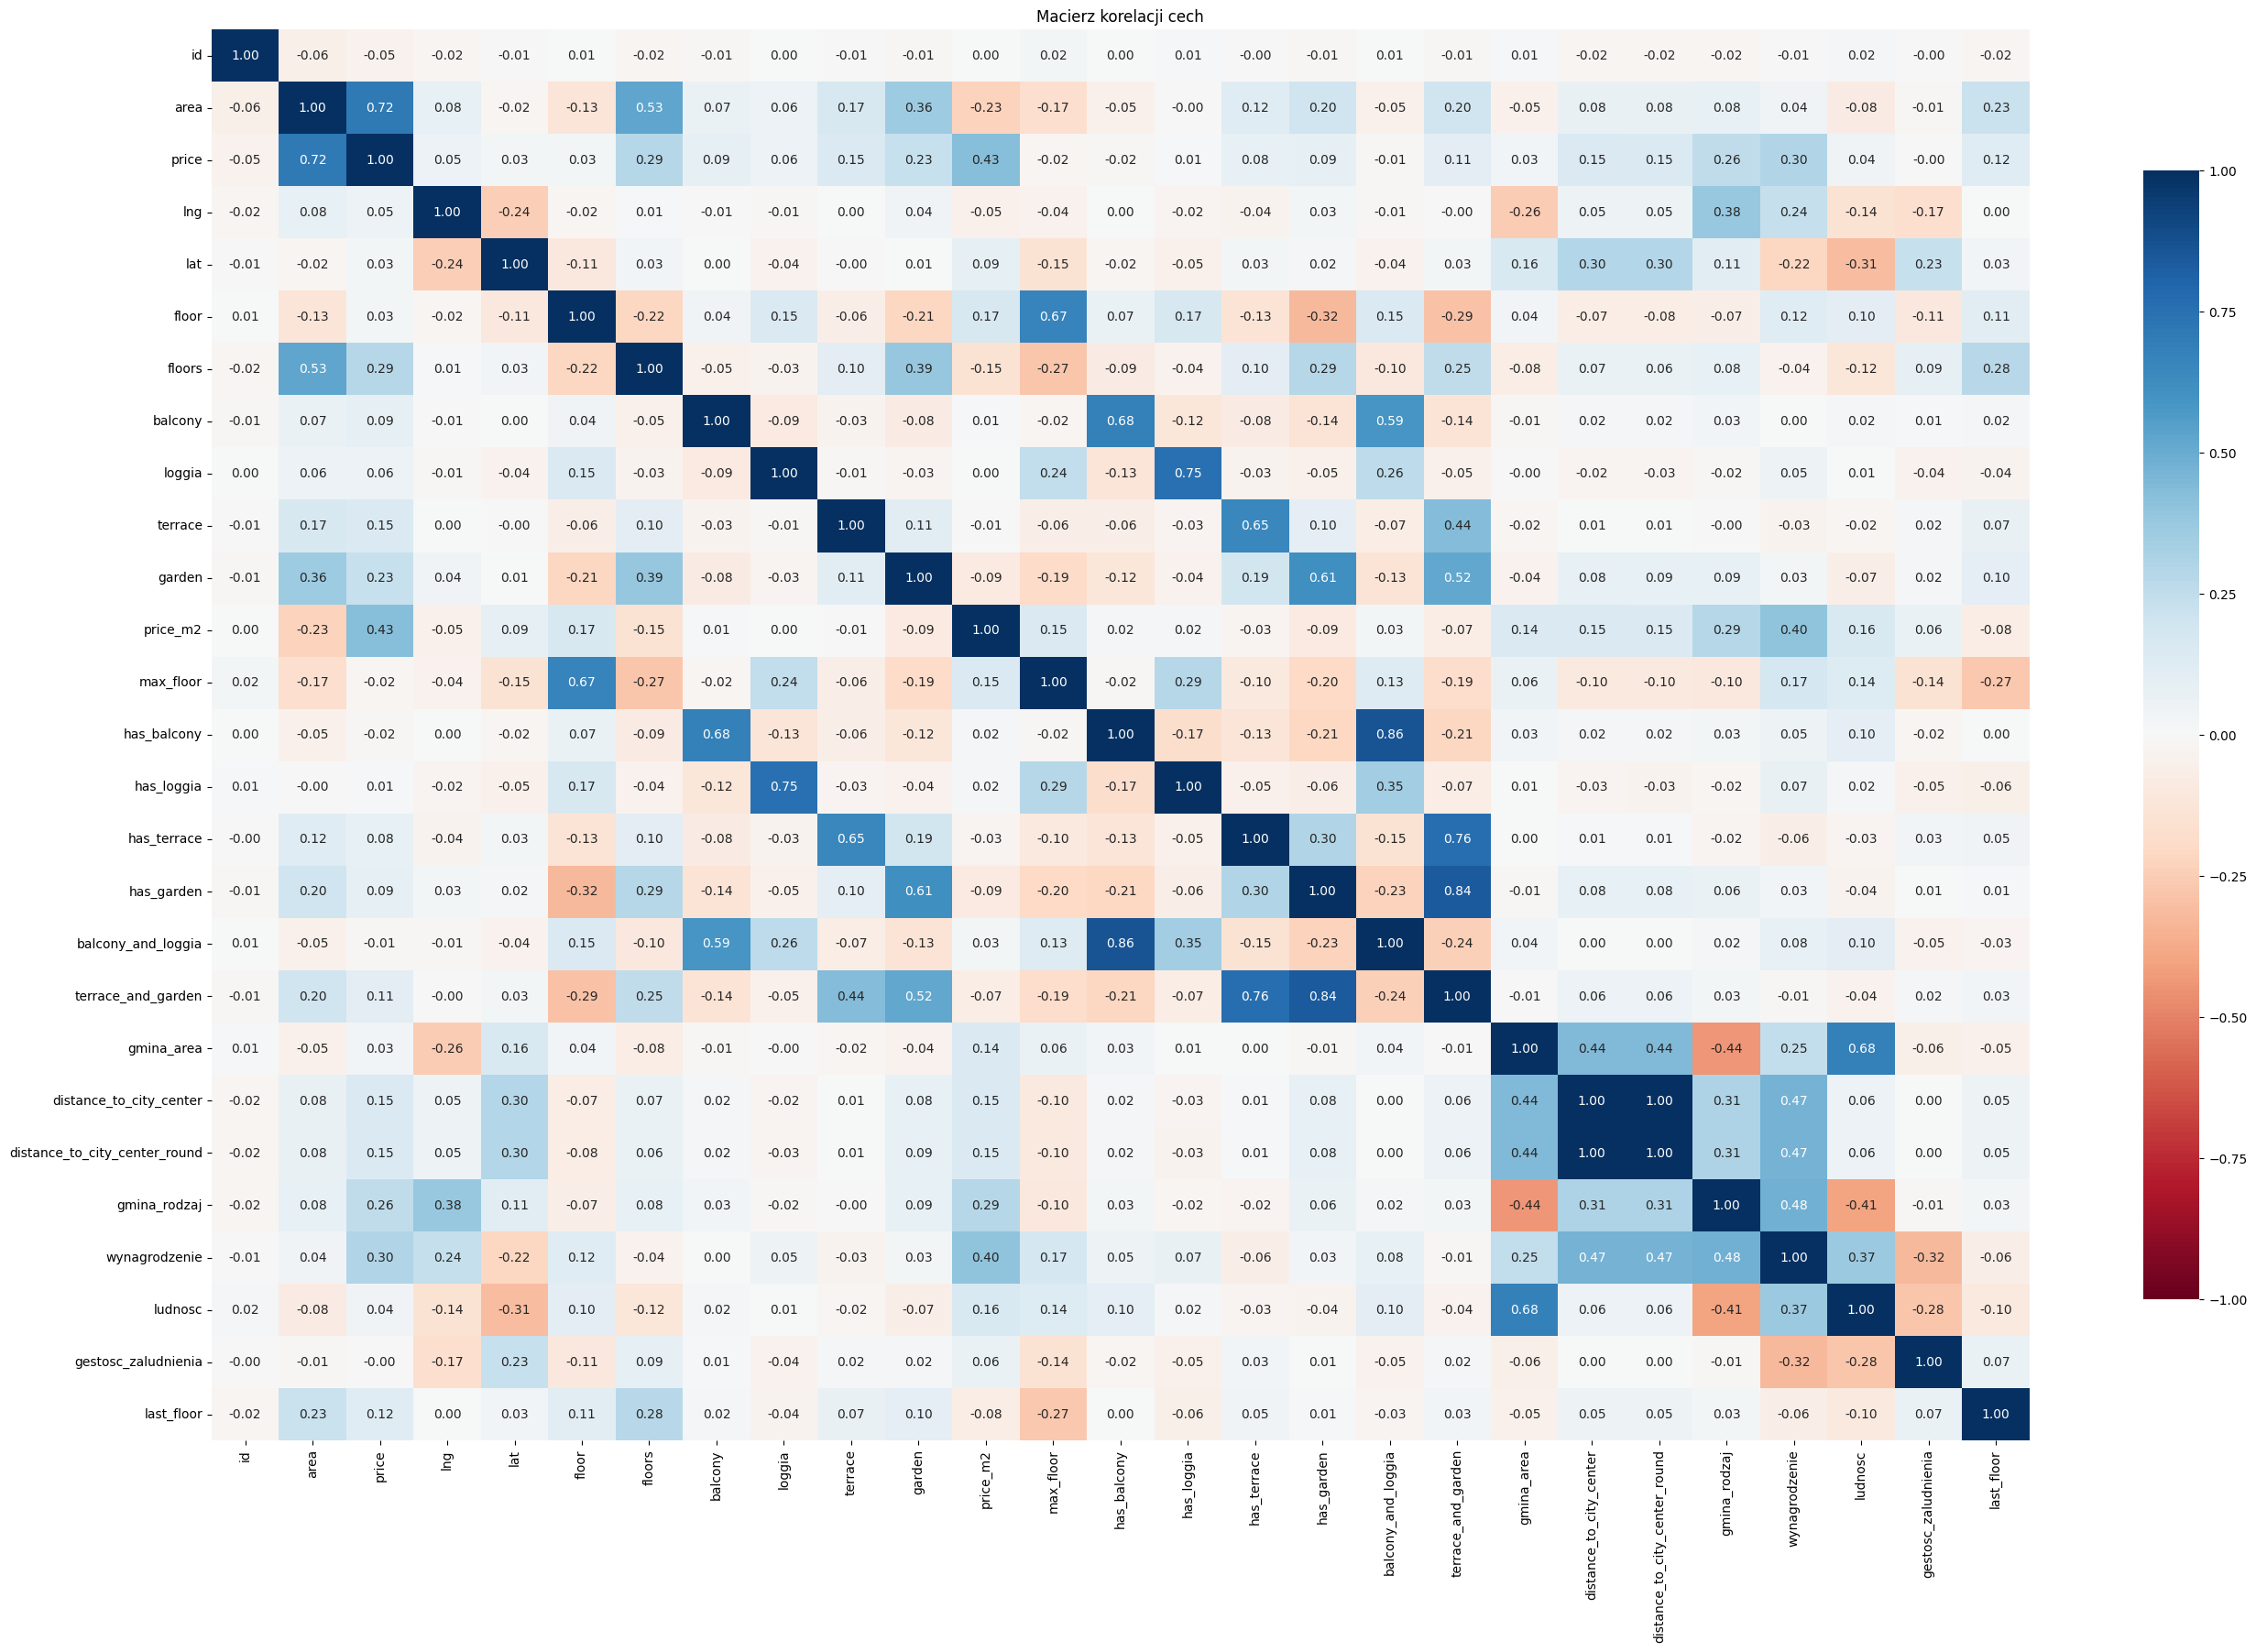

In [143]:
corr = df_numeric.corr()
plt.figure(figsize=(32,20))
sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu",
    fmt=".2f",
    cbar_kws={"shrink":0.8},
    center=0,
    vmin=-1,
    vmax=1
)
plt.title("Macierz korelacji cech")
plt.show()

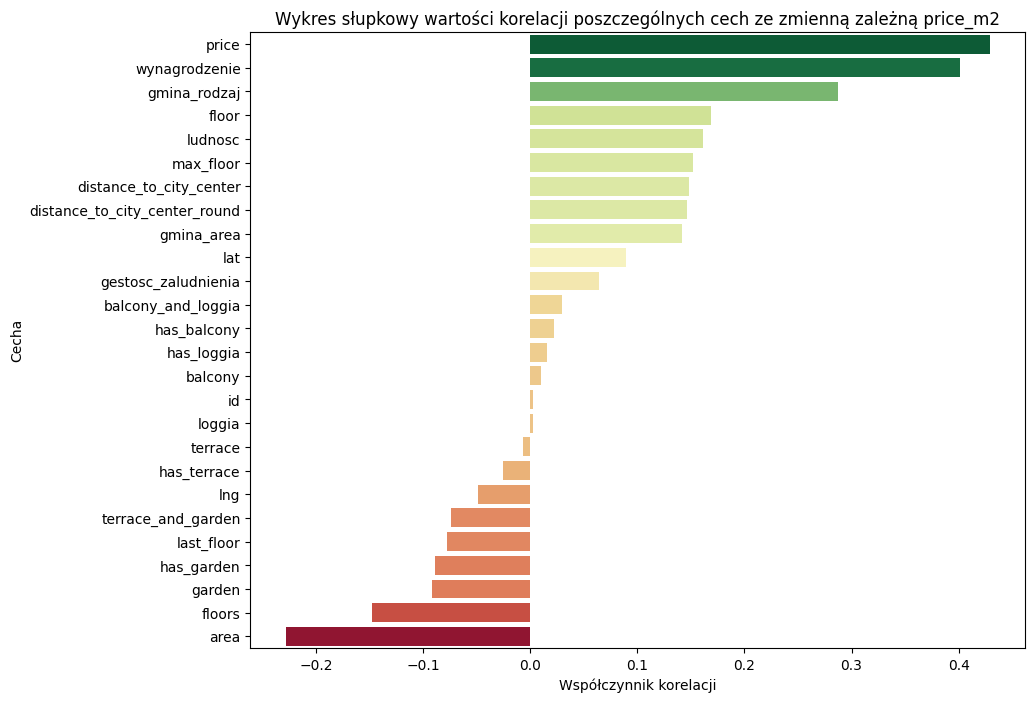

In [105]:
plot_data = corr[['price_m2']].reset_index().sort_values(by='price_m2', ascending=False)
plot_data = plot_data[plot_data["index"] != "price_m2"]
plt.figure(figsize=(10,8))
sns.barplot(
    data=plot_data,
    x = "price_m2",
    y="index",
    hue="price_m2",
    palette="RdYlGn",
    legend=False
    )
plt.xlabel("Współczynnik korelacji")
plt.ylabel("Cecha")
plt.title("Wykres słupkowy wartości korelacji poszczególnych cech ze zmienną zależną price_m2")
plt.show()

In [106]:
df_numeric_drop = df_numeric.drop(
    columns=[
        "price",
        "distance_to_city_center_round",
        "id",
        "loggia",
        "has_balcony",
        "has_garden",
        "terrace"
    ]
)

Budujemy model ML

In [107]:
target_col = "price_m2"
test_size = 0.2
val_size = 0.1
random_state = 42
X = df_numeric_drop.drop(columns=target_col)
y = df_numeric_drop[target_col]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(test_size+val_size), random_state=random_state)

test_ratio = test_size / (test_size+val_size)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_ratio, random_state=random_state)

In [109]:
print(len(df_numeric))
print(len(y_train))
print(len(y_test))
print(len(y_val))

91470
64028
18295
9147


In [142]:
model = xgb.XGBRegressor(
objective="reg:squarederror",
random_state=random_state,
n_estimators=500,
)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = model.predict(X_val)


[0]	validation_0-rmse:3522.95147
[1]	validation_0-rmse:3055.20803
[2]	validation_0-rmse:2720.92506
[3]	validation_0-rmse:2493.89091
[4]	validation_0-rmse:2346.47867
[5]	validation_0-rmse:2217.80215
[6]	validation_0-rmse:2138.18777
[7]	validation_0-rmse:2083.97774
[8]	validation_0-rmse:2033.15586
[9]	validation_0-rmse:1994.61133
[10]	validation_0-rmse:1960.53689
[11]	validation_0-rmse:1899.43751
[12]	validation_0-rmse:1855.91727
[13]	validation_0-rmse:1830.21920
[14]	validation_0-rmse:1811.26972
[15]	validation_0-rmse:1755.55393
[16]	validation_0-rmse:1736.47557
[17]	validation_0-rmse:1714.63159
[18]	validation_0-rmse:1698.95421
[19]	validation_0-rmse:1677.98107
[20]	validation_0-rmse:1666.81140
[21]	validation_0-rmse:1654.40660
[22]	validation_0-rmse:1616.55872
[23]	validation_0-rmse:1609.17030
[24]	validation_0-rmse:1594.13441
[25]	validation_0-rmse:1571.19533
[26]	validation_0-rmse:1563.83174
[27]	validation_0-rmse:1540.33937
[28]	validation_0-rmse:1515.54874
[29]	validation_0-rmse:1

In [111]:
plot_data = pd.DataFrame({
    "value":y_val,
    "predict":y_pred
})
plot_data

value       predict
35238  14732.685298  13895.795898
44491   9490.178768  10052.605469
2054   16016.923542  16120.149414
81166  20719.489982  20579.001953
59572  11133.102425  11012.103516
...             ...           ...
80861   6660.874602   6155.330078
87721   9444.444444   9398.272461
38442  16864.295125  17208.003906
72706  15267.175573  14894.374023
28021  14651.162791  14997.269531

[9147 rows x 2 columns]

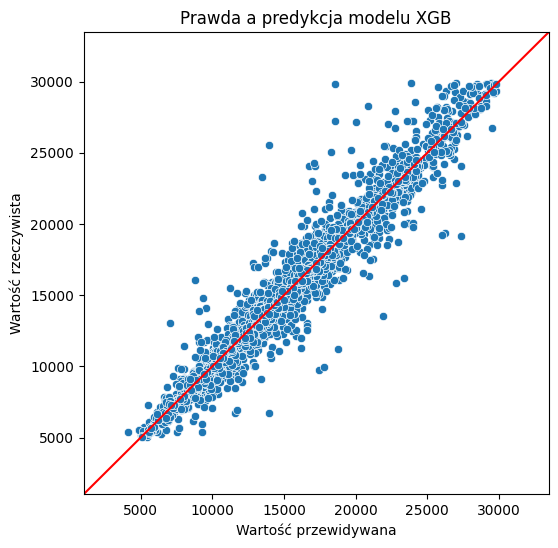

In [112]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=plot_data, x="predict", y='value')
plt.axline((2_500, 2_500), (32_000, 32_000), c="red")
plt.xlabel("Wartość przewidywana")
plt.ylabel("Wartość rzeczywista")
plt.title("Prawda a predykcja modelu XGB")
plt.show()

In [113]:
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
print(f"RMSE Walidacji: {rmse:.4f}")

RMSE Walidacji: 803.7792


In [141]:
joblib.dump(model, "model_all.pkl")

['model_all.pkl']

Część 5

In [140]:
model = joblib.load("model_all.pkl")

In [139]:
df_numeric.head()

id    area    price        lng        lat  floor  floors  balcony  loggia  \
0   2   67.05  1950000  18.658644  54.348504      3       1      0.0     0.0   
1   3   67.05  1950000  18.658672  54.348509      3       1      0.0     0.0   
2  35  156.40  1950000  18.567889  54.358179      0       2      0.0     0.0   
3  70   80.44  1620000  18.615439  54.349900      5       1      0.0     0.0   
4  89  117.70  1620000  18.657809  54.334621      1       1      0.0     0.0   

   terrace  ...  balcony_and_loggia  terrace_and_garden  gmina_area  \
0     0.00  ...                   0                   0  682.005967   
1     0.00  ...                   0                   0  682.005967   
2     0.00  ...                   0                   0  682.005967   
3    34.18  ...                   0                   1  682.005967   
4    23.11  ...                   0                   1  682.005967   

   distance_to_city_center  distance_to_city_center_round  gmina_rodzaj  \
0                10.680589                             11             1   
1                10.678933                             11             1   
2                14.902876                             15             1   
3                12.717979                             13             1   
4                11.865477                             12             1   

   wynagrodzenie  ludnosc  gestosc_zaludnienia  last_floor  
0        8915.97   487371             0.001399           0  
1        8915.97   487371             0.001399           0  
2        8915.97   487371             0.001399           1  
3        8915.97   487371             0.001399           0  
4        8915.97   487371             0.001399           1  

[5 rows x 27 columns]

In [119]:
data = {
    "id":1,
    "area": 55.5,
    "balcony": 8,
    "balcony_and_loggia": 8,
    "distance_to_city_center": 1.4,
    "floor": 4,
    "max_floor": 6,
    "floors": 1,
    "garden": 0,
    "gmina_area": 120,
    "gmina_rodzaj": 1,
    "has_loggia": 0,
    "has_terrace": 0,
    "lat": 52.42,
    "lng": 16.92,
    "ludnosc": 200_000,
    "terrace_and_garden": 0,
    "last_floor": 0,
    "wynagrodzenie": 7500,
    "gestosc_zaludnienia":0.0006
}

In [121]:
feature_names = model.get_booster().feature_names
predict_df = pd.DataFrame([data])
predict_df = predict_df[feature_names]
pred = model.predict(predict_df)
pred

array([11301.158], dtype=float32)

In [122]:
slownik_gmin_centrum_gdf = gpd.read_file('slownik_gmin_centrum.gpkg')
slownik_gmin_obrys_gdf = gpd.read_file('slownik_gmin_obrys.gpkg')

In [123]:
slownik_gmin_obrys_gdf

gmina_nazwa  gmina_area woj_teryt gmina_teryt  \
0               Piwniczna-ZdrĂłj  126.326235        12     1210133   
1                       Wadowice  112.674155        12     1218093   
2             Pietrowice Wielkie   67.880202        24     2411072   
3          Grodzisk Wielkopolski  134.589718        30     3005023   
4                      Pyskowice   31.184308        24     2405021   
...                          ...         ...       ...         ...   
2491          Bemowo - dzielnica   24.922155        14     1465028   
2492          Ochota - dzielnica    9.712965        14     1465068   
2493  Praga-PĂłĹ‚noc - dzielnica   11.298990        14     1465088   
2494           Wawer - dzielnica   79.641775        14     1465148   
2495        MokotĂłw - dzielnica   35.385507        14     1465058   

     powiat_teryt  gmina_rodzaj   ludnosc  wynagrodzenie  \
0         1210000             3    9941.0        5909.25   
1         1218000             3   36475.0        6048.26   
2         2411000             2    6544.0        7283.63   
3         3005000             3   20372.0        6233.27   
4         2405000             1   17236.0        6931.46   
...           ...           ...       ...            ...   
2491      1465000             8  129188.0        9625.74   
2492      1465000             8   79357.0        9625.74   
2493      1465000             8   59632.0        9625.74   
2494      1465000             8   88512.0        9625.74   
2495      1465000             8  225519.0        9625.74   

                                               geometry  
0     POLYGON ((20.75448 49.48064, 20.75479 49.48062...  
1     POLYGON ((19.51590 49.83905, 19.51544 49.83896...  
2     POLYGON ((18.10283 50.06274, 18.10249 50.06274...  
3     POLYGON ((16.31695 52.28271, 16.31756 52.28240...  
4     POLYGON ((18.60206 50.40179, 18.60226 50.40185...  
...                                                 ...  
2491  POLYGON ((20.91223 52.27288, 20.91282 52.27274...  
2492  POLYGON ((20.97512 52.19443, 20.97511 52.19443...  
2493  POLYGON ((21.05545 52.25304, 21.05511 52.25292...  
2494  POLYGON ((21.26151 52.16585, 21.26149 52.16580...  
2495  POLYGON ((21.08811 52.18174, 21.08750 52.18199...  

[2496 rows x 9 columns]

In [124]:
def find_gmina_teryt(map_df, lat, lng):
    """Funkcja znajduje gminę, w której leży podany punkt"""
    point = Point(lng, lat)
    for idx, row in map_df.iterrows():
        if row["geometry"].contains(point):
            return row["gmina_teryt"]
    return None
    
print(slownik_gmin_centrum_gdf[slownik_gmin_centrum_gdf["gmina_teryt"] == find_gmina_teryt(slownik_gmin_obrys_gdf, 50.01, 19.55)])
kod_teryt = find_gmina_teryt(slownik_gmin_obrys_gdf, 50.05, 19.55)

     gmina_nazwa woj_teryt gmina_teryt                   geometry
1056  Spytkowice        12     1218062  POINT (19.51791 49.98584)


In [125]:
def find_distance_to_city_center(map_df, teryt, lat, lng):
    """Funkcja znajduje odległość do najbliższego centrum miasta"""
    center = map_df[map_df["gmina_teryt"] == teryt]['geometry'].values[0]
    return geodesic((center.y, center.x), (lat,lng)).km

print(find_distance_to_city_center(slownik_gmin_centrum_gdf, kod_teryt, 50.05, 19.55))

1.6589386373660744


In [126]:
def get_gus_data(map_df, teryt):
    """Funkcja podaje dane dot. podanej gminy"""
    # ludnosc, wynagrodzenie, gmina_area, gestosc_zaludnienia, gmina_rodzaj
    row = map_df[map_df["gmina_teryt"] == teryt]
    if row.shape[0]:
        return {
        "ludnosc":row["ludnosc"].values[0],
        "wynagrodzenie":row['wynagrodzenie'].values[0],
        "gmina_area":row["gmina_area"].values[0],
        "gestosc_zaludnienia":row["gmina_area"].values[0] / row["ludnosc"].values[0],
        "gmina_rodzaj":row["gmina_rodzaj"].values[0]
        }
    return {
        "ludnosc":None,
        "wynagrodzenie":None,
        "gmina_area":None,
        "gestosc_zaludnienia":None,
        "gmina_rodzaj":None
    }

print(get_gus_data(slownik_gmin_obrys_gdf, kod_teryt))

{'ludnosc': 12354.0, 'wynagrodzenie': 6898.73, 'gmina_area': 73.74950764732009, 'gestosc_zaludnienia': 0.005969686550697757, 'gmina_rodzaj': 3}


In [127]:
# dane wejściowe do pobrania od użytkownika

data = {
    "lng": 20.9524065,
    "lat": 52.3391106,
    "area": 72.7,
    "balcony": 0,
    "floor": 8,
    "max_floor": 8,
    "floors": 1,
    "garden": 0,
    "loggia": 11,
    "terrace": 17,
}

In [128]:
# dane wyliczane
data["last_floor"] = 1 if data["floor"] == data["max_floor"] else 0
data["has_loggia"] = 1 if data["loggia"] > 0 else 0
data["has_terrace"] = 1 if data["terrace"] > 0 else 0
data["balcony_and_loggia"] = data["balcony"] + data["loggia"]
data["terrace_and_garden"] = data["terrace"] + data["garden"]

In [129]:
data.pop('loggia')
data.pop('terrace')

17

In [130]:
# kod gminy, w którym leży wskazany punkt
gm_teryt = find_gmina_teryt(slownik_gmin_obrys_gdf, data["lat"], data["lng"])

data["distance_to_city_center"] = find_distance_to_city_center(slownik_gmin_centrum_gdf, gm_teryt, data["lat"], data["lng"])

data_gus = get_gus_data(slownik_gmin_obrys_gdf, gm_teryt)

data = data | data_gus

data

{'lng': 20.9524065,
 'lat': 52.3391106,
 'area': 72.7,
 'balcony': 0,
 'floor': 8,
 'max_floor': 8,
 'floors': 1,
 'garden': 0,
 'last_floor': 1,
 'has_loggia': 1,
 'has_terrace': 1,
 'balcony_and_loggia': 11,
 'terrace_and_garden': 17,
 'distance_to_city_center': 13.84696846391681,
 'ludnosc': 158749.0,
 'wynagrodzenie': 9625.74,
 'gmina_area': 72.93394552106551,
 'gestosc_zaludnienia': 0.00045942932252212936,
 'gmina_rodzaj': 8}

In [131]:
feature_names = model.get_booster().feature_names

predict_df = pd.DataFrame([data])
predict_df = predict_df[feature_names]
predict_df

area        lng        lat  floor  floors  balcony  garden  max_floor  \
0  72.7  20.952406  52.339111      8       1        0       0          8   

   has_loggia  has_terrace  balcony_and_loggia  terrace_and_garden  \
0           1            1                  11                  17   

   gmina_area  distance_to_city_center  gmina_rodzaj  wynagrodzenie   ludnosc  \
0   72.933946                13.846968             8        9625.74  158749.0   

   gestosc_zaludnienia  last_floor  
0             0.000459           1

In [132]:
price_m2 = model.predict(predict_df)[0]
print(f"{price_m2:.2f} zł za metr kwadratowy.")
all = price_m2 * data['area']
print(f"{all:.2f} zł za całe mieszkanie.")

15257.97 zł za metr kwadratowy.
1109254.19 zł za całe mieszkanie.
